In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
import os
from itertools import combinations
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

#mpl('font', family='AppleGothic')
#plt.rcParams['axes.unicode_minus'] = False #Apple
plt.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] = False  # ÎßàÏù¥ÎÑàÏä§ Íπ®Ïßê Î∞©ÏßÄ

In [2]:
# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
save_dir = os.path.abspath("/img")
os.makedirs(save_dir, exist_ok=True)
marketing = pd.read_csv('marketing_advanced.csv', encoding='cp949')

In [3]:
def check_df(dataframe):
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', 1000)
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.info())
    print("##################### Describe #####################")
    print(dataframe.describe(include='all'))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())

In [4]:
def uni_df(dataframe):
    for col in dataframe:
        print(col,dataframe[col].unique())
        print(col,dataframe[col].nunique())

In [5]:
check_df(marketing)

##################### Shape #####################
(104899, 25)
##################### Types #####################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104899 entries, 0 to 104898
Data columns (total 25 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       104899 non-null  object 
 1   customer_id                    104899 non-null  object 
 2   order_status                   104899 non-null  object 
 3   order_purchase_timestamp       104899 non-null  object 
 4   order_approved_at              104899 non-null  object 
 5   order_delivered_timestamp      102623 non-null  object 
 6   order_estimated_delivery_date  104899 non-null  object 
 7   age                            104899 non-null  int64  
 8   gender                         104899 non-null  object 
 9   country                        104899 non-null  object 
 10  payment_type                   104899 n

In [6]:
marketing.head()

order_id                       customer_id order_status order_purchase_timestamp order_approved_at order_delivered_timestamp order_estimated_delivery_date  age gender country payment_type  payment_installments                         seller_id  shipping_charges category1 category2   price  delivery_delay_days  approval_delay_minutes  weight_kg  volume_cm3  review_score marketing_info_agree agegroup        product_id
0  e22acc9c116caa3f2b7121bbb380d08e  0000366f3b9a7992bf8c76cfdf3221e2    delivered         2024-10-10 16:29  2024-10-10 19:21          2024-10-16 20:48                    2024-10-21   56     ÎÇ®ÏÑ±     ÌïÄÎûÄÎìú  credit_card                     8  da8622b14eb17ae2831f4ac5b9dab84a                12        ÏãùÌíà      Í±¥Í∞ïÏãùÌíà   62.17                 -5.0                    15.0          5    11845.97             5                    y      50ÎåÄ  d2e1b02d25294e6f
1  3594e05a005ac4d06a72673270ef9ec9  0000b849f77a49e4a4ce2b2a4ca5be3f    delivered         2024-10-07 17:47  2024-10-07 19:14          2024-10-10 18:02                    2024-10-15   61     Ïó¨ÏÑ±      ÌïúÍµ≠  credit_card                     1  138dbe45fc62f1e244378131a6801526                 8        ÏãùÌíà      Í±¥Í∞ïÏãùÌíà   57.90                 -5.0                   434.0          1    25981.89             4                    y      50ÎåÄ  d2e1b02d25294e6f
2  b33ec3b699337181488304f362a6b734  0000f46a3911fa3c0805444483337064    delivered         2023-08-10 16:35  2023-08-10 19:29          2023-09-05 14:38                    2023-09-07   51     ÎÇ®ÏÑ±     ÌïÑÎ¶¨ÌïÄ  credit_card                     8  3d871de0142ce09b7081e2b9d1733cb1                17        ÏãùÌíà      Í±¥Í∞ïÏãùÌíà   60.34                 -2.0                     0.0          0    26478.17             2                    n      50ÎåÄ  d2e1b02d25294e6f
3  41272756ecddd9a9ed0180413cc22fb6  0000f6ccb0745a6a4b88665a16c9f078    delivered         2024-03-12 15:03  2024-03-12 17:00          2024-04-01 21:23                    2024-04-13   34     Ïó¨ÏÑ±     Îç¥ÎßàÌÅ¨  credit_card                     4  ef506c96320abeedfb894c34db06f478                17      Ï†ÑÏûêÏ†úÌíà      ÏùåÌñ•Í∞ÄÏ†Ñ  128.17                -12.0                    20.0         10   208064.64             4                    y      30ÎåÄ  f9614bb192ee4050
4  d957021f1127559cd947b62533f484f7  0004aac84e0df4da2b147fca70cf8255    delivered         2024-04-14 13:49  2024-04-14 15:41          2024-04-27 23:08                    2024-05-05   42     ÎÇ®ÏÑ±     Î≤®Í∏∞Ïóê  credit_card                     6  70a12e78e608ac31179aea7f8422044b                16      Ï†ÑÏûêÏ†úÌíà      Ï£ºÎ∞©Í∞ÄÏ†Ñ  110.15                 -8.0                    21.0          5   185186.95             2                    y      40ÎåÄ  76a306b4cd254f91

In [7]:
# ÎÇ†ÏßúÌòïÏúºÎ°ú Î≥ÄÌôòÌï† Ïª¨Îüº Î™©Î°ù
date_cols = [
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_timestamp',
    'order_estimated_delivery_date'
]
for col in date_cols:
    marketing[col] = pd.to_datetime(marketing[col], errors='coerce')

In [8]:
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104899 entries, 0 to 104898
Data columns (total 25 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       104899 non-null  object        
 1   customer_id                    104899 non-null  object        
 2   order_status                   104899 non-null  object        
 3   order_purchase_timestamp       104899 non-null  datetime64[ns]
 4   order_approved_at              104899 non-null  datetime64[ns]
 5   order_delivered_timestamp      102623 non-null  datetime64[ns]
 6   order_estimated_delivery_date  104899 non-null  datetime64[ns]
 7   age                            104899 non-null  int64         
 8   gender                         104899 non-null  object        
 9   country                        104899 non-null  object        
 10  payment_type                   104899 non-null  object        
 11  

In [9]:
uni_df(marketing)

order_id ['e22acc9c116caa3f2b7121bbb380d08e' '3594e05a005ac4d06a72673270ef9ec9'
 'b33ec3b699337181488304f362a6b734' ... 'fdc45e6c7555e6cb3cc0daca2557dbe1'
 '94d3ee0bc2a0af9d4fa47a4d63616e8d' 'f79a35da168301ae56922475da21117b']
order_id 98665
customer_id ['0000366f3b9a7992bf8c76cfdf3221e2' '0000b849f77a49e4a4ce2b2a4ca5be3f'
 '0000f46a3911fa3c0805444483337064' ... 'ffff371b4d645b6ecea244b27531430a'
 'ffff5962728ec6157033ef9805bacc48' 'ffffd2657e2aad2907e67c3e9daecbeb']
customer_id 95419
order_status ['delivered' 'shipped' 'canceled' 'invoiced' 'processing' 'unavailable'
 'approved']
order_status 7
order_purchase_timestamp <DatetimeArray>
['2024-10-10 16:29:00', '2024-10-07 17:47:00', '2023-08-10 16:35:00', '2024-03-12 15:03:00', '2024-04-14 13:49:00', '2024-09-05 19:12:00', '2024-09-20 17:23:00', '2024-07-28 12:48:00', '2024-07-28 16:30:00', '2023-08-04 16:18:00',
 ...
 '2024-01-11 18:24:00', '2024-12-20 11:59:00', '2024-12-02 20:41:00', '2024-02-01 05:48:00', '2024-05-27 20:22:00', '202

In [10]:
# Ïò§ÌÉÄ ÏàòÏ†ï
marketing['category2'] = marketing['category2'].replace('ÎÇöÏÑ∏', 'ÎÇöÏãú')
uni_df(marketing)

order_id ['e22acc9c116caa3f2b7121bbb380d08e' '3594e05a005ac4d06a72673270ef9ec9'
 'b33ec3b699337181488304f362a6b734' ... 'fdc45e6c7555e6cb3cc0daca2557dbe1'
 '94d3ee0bc2a0af9d4fa47a4d63616e8d' 'f79a35da168301ae56922475da21117b']
order_id 98665
customer_id ['0000366f3b9a7992bf8c76cfdf3221e2' '0000b849f77a49e4a4ce2b2a4ca5be3f'
 '0000f46a3911fa3c0805444483337064' ... 'ffff371b4d645b6ecea244b27531430a'
 'ffff5962728ec6157033ef9805bacc48' 'ffffd2657e2aad2907e67c3e9daecbeb']
customer_id 95419
order_status ['delivered' 'shipped' 'canceled' 'invoiced' 'processing' 'unavailable'
 'approved']
order_status 7
order_purchase_timestamp <DatetimeArray>
['2024-10-10 16:29:00', '2024-10-07 17:47:00', '2023-08-10 16:35:00', '2024-03-12 15:03:00', '2024-04-14 13:49:00', '2024-09-05 19:12:00', '2024-09-20 17:23:00', '2024-07-28 12:48:00', '2024-07-28 16:30:00', '2023-08-04 16:18:00',
 ...
 '2024-01-11 18:24:00', '2024-12-20 11:59:00', '2024-12-02 20:41:00', '2024-02-01 05:48:00', '2024-05-27 20:22:00', '202

In [11]:
#Ï§ëÎ≥µ ÌôïÏù∏
marketing[marketing.duplicated(keep=False)]

Empty DataFrame
Columns: [order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_timestamp, order_estimated_delivery_date, age, gender, country, payment_type, payment_installments, seller_id, shipping_charges, category1, category2, price, delivery_delay_days, approval_delay_minutes, weight_kg, volume_cm3, review_score, marketing_info_agree, agegroup, product_id]
Index: []

In [12]:
# Í≥†Í∞ù Ï†ïÎ≥¥ Î∂àÏùºÏπò ÌôïÏù∏
# ÎπÑÍµêÌï† Ïª¨Îüº Î™©Î°ù
cols_to_check = ['age', 'gender', 'country', 'marketing_info_agree', 'agegroup']

# customer_id Í∏∞Ï§ÄÏúºÎ°ú Í∑∏Î£πÌïëÌñàÏùÑ Îïå, Ìï¥Îãπ Ïª¨ÎüºÎì§Ïù¥ Ïó¨Îü¨ Í∞íÏù¥ ÏûàÎäî Í≤ΩÏö∞ ÌïÑÌÑ∞ÎßÅ
inconsistent_customers = marketing.groupby('customer_id')[cols_to_check] \
    .nunique() \
    .reset_index()

# ÌïòÎÇòÎùºÎèÑ Í∞íÏù¥ 2Í∞ú Ïù¥ÏÉÅÏù∏ Í≤ΩÏö∞Îßå ÌïÑÌÑ∞ÎßÅ
inconsistent_customers = inconsistent_customers[
    (inconsistent_customers[cols_to_check] > 1).any(axis=1)
]

# Ïù¥ customer_idÎì§Ïùò ÏõêÎûò Îç∞Ïù¥ÌÑ∞ Î≥¥Í∏∞
inconsistent_detail = marketing[marketing['customer_id'].isin(inconsistent_customers['customer_id'])]

# Í≤∞Í≥º ÌôïÏù∏
inconsistent_detail.sort_values('customer_id').head()

Empty DataFrame
Columns: [order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_timestamp, order_estimated_delivery_date, age, gender, country, payment_type, payment_installments, seller_id, shipping_charges, category1, category2, price, delivery_delay_days, approval_delay_minutes, weight_kg, volume_cm3, review_score, marketing_info_agree, agegroup, product_id]
Index: []

In [67]:
marketing[marketing['weight_kg'] == 0]

order_id                       customer_id order_status order_purchase_timestamp   order_approved_at order_delivered_timestamp order_estimated_delivery_date  age gender country payment_type  payment_installments                         seller_id  shipping_charges category1 category2   price  delivery_delay_days  approval_delay_minutes  weight_kg  volume_cm3  review_score marketing_info_agree agegroup        product_id
2       b33ec3b699337181488304f362a6b734  0000f46a3911fa3c0805444483337064    delivered      2023-08-10 16:35:00 2023-08-10 19:29:00       2023-09-05 14:38:00                    2023-09-07   51     ÎÇ®ÏÑ±     ÌïÑÎ¶¨ÌïÄ  credit_card                     8  3d871de0142ce09b7081e2b9d1733cb1                17        ÏãùÌíà      Í±¥Í∞ïÏãùÌíà   60.34                 -2.0                     0.0          0    26478.17             2                    n      50ÎåÄ  d2e1b02d25294e6f
17      34801c59d6ec5c5e89bfefb6ebef314d  000c8bdb58a29e7115cfc257230fb21b    delivered      2024-05-12 15:13:00 2024-05-12 16:42:00       2024-05-27 01:37:00                    2024-06-05   57     ÎÇ®ÏÑ±      Ï§ëÍµ≠  credit_card                     2  3771c85bac139d2344864ede5d9341e3                15        ÏãùÌíà      Í∞ÄÍ≥µÏãùÌíà   71.35                 -9.0                    49.0          0    11457.45             4                    y      50ÎåÄ  d36740e054b84215
20      c6d61340bd8baeedca7cc8e7f7ec07e9  000de6019bb59f34c099a907c151d855    delivered      2024-01-17 13:42:00 2024-01-17 13:56:00       2024-01-21 19:18:00                    2024-02-06   32     Ïó¨ÏÑ±      Ï§ëÍµ≠  credit_card                     4  da8622b14eb17ae2831f4ac5b9dab84a                10      Ï†ÑÏûêÏ†úÌíà      Í±¥Í∞ïÍ∞ÄÏ†Ñ  126.46                -16.0                    45.0          0   208303.30             2                    y      30ÎåÄ  de1d01b9c78c4f9c
21      c5d3fae065a8090bae39f4f34b14cd06  000e309254ab1fc5ba99dd469d36bdb4    delivered      2024-11-25 18:06:00 2024-11-25 18:38:00       2024-12-09 23:04:00                    2024-12-24   44     Ïó¨ÏÑ±     Ïä§ÏúÑÏä§  credit_card                     1  a6fe7de3d16f6149ffe280349a8535a0                18        ÏãùÌíà      Ïã†ÏÑ†ÏãùÌíà   83.01                -15.0                    21.0          0    19118.26             3                    y      40ÎåÄ  71926bbfce2a47bc
22      c5d3fae065a8090bae39f4f34b14cd06  000e309254ab1fc5ba99dd469d36bdb4    delivered      2024-11-25 20:22:00 2024-11-25 23:00:00       2024-12-09 23:04:00                    2024-12-24   44     Ïó¨ÏÑ±     Ïä§ÏúÑÏä§      voucher                     1  a6fe7de3d16f6149ffe280349a8535a0                18        ÏãùÌíà      Í∞ÄÍ≥µÏãùÌíà   70.53                -15.0                    21.0          0    12196.99             3                    y      40ÎåÄ  d36740e054b84215
...                                  ...                               ...          ...                      ...                 ...                       ...                           ...  ...    ...     ...          ...                   ...                               ...               ...       ...       ...     ...                  ...                     ...        ...         ...           ...                  ...      ...               ...
104865  9d43eaf1f72a6d200577517c4e4265e0  ffe9be10b9a58c5464d833e8b1b2c632    delivered      2024-04-27 12:21:00 2024-04-27 13:02:00       2024-05-14 17:58:00                    2024-05-21   24     Ïó¨ÏÑ±      ÏòÅÍµ≠  credit_card                     2  4e922959ae960d389249c378d1c939f5                15        ÏãùÌíà      Í∞ÄÍ≥µÏãùÌíà   68.12                 -7.0                    14.0          0    17706.60             2                    y      20ÎåÄ  d36740e054b84215
104879  f5691c2b1ca263490374d13d020bd950  fff1bdd5c5e37ca79dd74deeb91aa5b6    delivered      2024-07-24 20:52:00 2024-07-24 21:39:00       2024-09-23 17:53:00                    2024-08-22   43     ÎÇ®ÏÑ±    Ïã±Í∞ÄÌè¨Î•¥   debit_card                     1  f

In [13]:
# order_statusÎ≥Ñ Í≤∞Ï∏°Ïπò ÌôïÏù∏
# order_statusÎ≥Ñ count ÌôïÏù∏
print(marketing['order_status'].value_counts())

order_status
delivered      102624
shipped          1143
canceled          481
invoiced          331
processing        311
unavailable         7
approved            2
Name: count, dtype: int64


In [14]:
# order_delivered_timestampÏù¥ Í≤∞Ï∏°Ïù∏ Í≤ΩÏö∞Ïùò order_status ÌôïÏù∏
print(marketing[marketing['order_delivered_timestamp'].isnull()]['order_status'].value_counts())

# Î∞∞ÏÜ°Ïù¥ ÎêòÏßÄ ÏïäÏùÄ Í≥†Í∞ùÎì§Ïùò order_delivered_timestampÍ∞Ä Í≤∞Ï∏°Ïπò Ïù∏Í≤É ÏùÑ ÌôïÏù∏ Ìï†Ïàò ÏûàÎã§. Í∑∏ÎüºÏúºÎ°ú ÌÉÄÎãπÌïú Í≤∞Ï∏°ÏπòÏûÑÏúºÎ°ú Ïú†ÏßÄÌïúÎã§.
# canceledÏù∏Îç∞ order_delivered_timestampÏûàÎäî Í∞íÍ≥º deliveredÏù∏Îç∞ order_delivered_timestamp ÏóÜÎäî Í∞í ÌôïÏù∏ ÌïÑÏöî

order_status
shipped        1143
canceled        474
invoiced        331
processing      311
delivered         8
unavailable       7
approved          2
Name: count, dtype: int64


In [15]:
# Ïã§Ï†ú Î∞∞ÏÜ° ÏôÑÎ£åÎêú Í≥†Í∞ùÎßå approval_delay_minutes(Í≤∞Ï†úÏäπÏù∏ÍπåÏßÄ Í±∏Î¶∞ ÏãúÍ∞Ñ (Î∂Ñ Îã®ÏúÑ)) Í≤∞Ï∏°Í∞íÏùÑ Ï§ëÏïôÍ∞íÏúºÎ°ú ÎåÄÏ≤¥
median_approval_delay = marketing[marketing['order_status'] == 'delivered']['approval_delay_minutes'].median()
marketing['approval_delay_minutes'].fillna(median_approval_delay, inplace=True)
# approval_delay_minutes Í≤∞Ï∏°Í∞íÏù¥ ÏÇ¨ÎùºÏßê
marketing.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_timestamp        2276
order_estimated_delivery_date       0
age                                 0
gender                              0
country                             0
payment_type                        0
payment_installments                0
seller_id                           0
shipping_charges                    0
category1                           0
category2                           0
price                               0
delivery_delay_days              2276
approval_delay_minutes              0
weight_kg                           0
volume_cm3                          0
review_score                        0
marketing_info_agree                0
agegroup                            0
product_id                          0
dtype: int64

In [16]:
# deliveredÏù∏Îç∞ order_delivered_timestamp ÏóÜÎäî Í∞í ÌôïÏù∏ ÌïÑÏöî
marketing_delivered = marketing[marketing['order_status'] == 'delivered'].copy()
# Î∞∞ÏÜ° ÏôÑÎ£åÎêú Í≥†Í∞ùÏ§ë order_delivered_timestamp(Î∞∞ÏÜ° ÏôÑÎ£åÏãúÍ∞Ñ) Í≤∞Ï∏°Í∞í ÌôïÏù∏
marketing_delivered.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_timestamp        8
order_estimated_delivery_date    0
age                              0
gender                           0
country                          0
payment_type                     0
payment_installments             0
seller_id                        0
shipping_charges                 0
category1                        0
category2                        0
price                            0
delivery_delay_days              8
approval_delay_minutes           0
weight_kg                        0
volume_cm3                       0
review_score                     0
marketing_info_agree             0
agegroup                         0
product_id                       0
dtype: int64

In [17]:
# delivery_delay_daysÍ∞Ä NullÏù∏ Ìï≠Î™©ÏùÄ order_delivered_timestampÏùÑ ÏïåÏàò ÏóÜÏùåÏúºÎ°ú Í≤∞Ï∏°Ïπò Ï†úÍ±∞
marketing_delivered = marketing_delivered[marketing_delivered['order_delivered_timestamp'].notnull()].copy()

marketing_delivered.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_timestamp        0
order_estimated_delivery_date    0
age                              0
gender                           0
country                          0
payment_type                     0
payment_installments             0
seller_id                        0
shipping_charges                 0
category1                        0
category2                        0
price                            0
delivery_delay_days              0
approval_delay_minutes           0
weight_kg                        0
volume_cm3                       0
review_score                     0
marketing_info_agree             0
agegroup                         0
product_id                       0
dtype: int64

In [18]:
# Î¨¥Í≤åÍ∞Ä 0Ïù∏Í≤É Ïπ¥ÌÖåÍ≥†Î¶¨ ÌôïÏù∏ Î∞è Ïπ¥ÌÖåÍ≥†Î¶¨ ÌèâÍ∑†Í∞íÏúºÎ°ú ÎåÄÏ≤¥ Ìï†Í≤ÉÏù∏ÏßÄ ÌôïÏù∏
zero_weight = marketing_delivered[marketing_delivered['weight_kg'] == 0]
zero_weight_categories = zero_weight['category2'].unique()

category_weight_mean = marketing_delivered[marketing_delivered['weight_kg'] > 0].groupby('category2')['weight_kg'].mean().round()

def round_to_custom_bin(x):
    if x < 5:
        return 1
    elif x < 10:
        return 5
    elif x < 25:
        return 10
    else:
        return 25

category_weight_mean = category_weight_mean.apply(round_to_custom_bin)

category_weight_mean

category2
1Ïù∏Í∞ÄÍµ¨       10
Í∞ÄÍ≥µÏãùÌíà        5
Í±∞Ïã§Ïû•/ÌÖåÏù¥Î∏î    10
Í±¥Í∞ïÍ∞ÄÏ†Ñ        5
Í±¥Í∞ïÏãùÌíà        5
Í≥®ÌîÑ          5
ÎÇöÏãú          5
ÎÇ®ÏÑ±ÏùòÎ•ò        1
ÎÇ®ÏÑ±ÌôîÏû•Ìíà       5
ÎÉâÏû•Í≥†         5
ÎÑ§ÏùºÏºÄÏñ¥        1
Îì±ÏÇ∞          5
ÎßàÏä§ÌÅ¨/Ìå©       5
Î©îÏù¥ÌÅ¨ÏóÖ        5
Î∞îÎîîÏºÄÏñ¥        5
ÎπÑÎç∞          5
ÏÑ†ÏºÄÏñ¥         5
ÏÑ∏ÌÉÅÍ∏∞/Í±¥Ï°∞Í∏∞     5
ÏáºÌåå         10
ÏàòÎÇ©Ïû•/ÏÑ†Î∞ò     10
Ïä§ÌÇ®ÏºÄÏñ¥        5
Ïä§Ìè¨Ï∏†ÏùòÎ•ò       1
Ïã†ÏÑ†ÏãùÌíà        5
ÏïºÏô∏Í∞ÄÍµ¨       10
Ïó¨ÏÑ±ÏùòÎ•ò        1
Ïò∑Ïû•/ÌñâÍ±∞      10
Ïú†ÏïÑÏùòÎ•ò        1
ÏùåÌñ•Í∞ÄÏ†Ñ        5
Ï£ºÎ∞©Í∞ÄÏ†Ñ        5
Ï±ÖÏÉÅ/Ï±ÖÏû•      10
Ï≤≠ÏÜåÍ∏∞         5
Ïπ®ÎåÄ         10
Ï∫†Ìïë          5
ÌååÌã∞ÏùòÎ•ò        1
Ìñ•Ïàò          5
Ìó§Ïñ¥ÏºÄÏñ¥        1
ÌôîÏû•ÎåÄ        10
Name: weight_kg, dtype: int64

In [19]:
# Î¨¥Í≤åÍ∞Ä ÌÉÄÎãπÌï¥ Î≥¥Ïó¨ÏÑú Î¨¥Í≤åÍ∞Ä 0Ïù∏Í≤É Ïπ¥ÌÖåÍ≥†Î¶¨ ÌèâÍ∑† Î¨¥Í≤åÎ°ú Í∏∞ÏûÖ
def fill_weight(row):
    if row['weight_kg'] == 0 and row['category2'] in category_weight_mean:
        return category_weight_mean[row['category2']]
    return row['weight_kg']

# Ï†ÅÏö©
marketing_delivered['weight_kg'] = marketing_delivered.apply(fill_weight, axis=1)

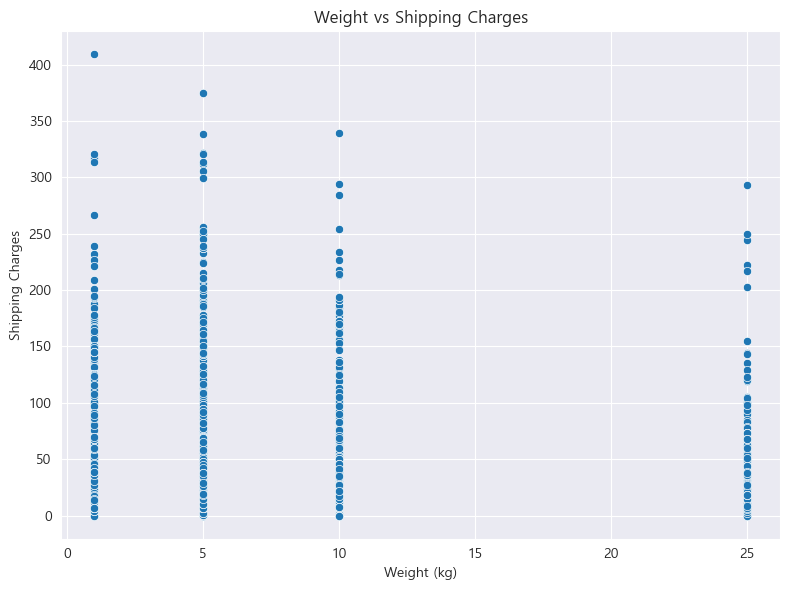

In [20]:
#   Î¨¥Í≤åÎûë Î∞∞ÏÜ°ÎπÑ ÎπÑÍµê Î∞∞ÏÜ°ÎπÑÍ∞Ä ÎÑò ÎßéÏùÄ Í≤ΩÏö∞ Î¨¥Í≤åÍ∞Ä ÎßéÏù¥ Îì§Ïñ¥ÏÑú ÎπÑÏãºÍ∞Ä?? Í∑∏Îüº Ìï©Î¶¨Ï†ÅÏù∏Í∞Ä? Î≥¥Î†§Í≥† - ÏÑ†ÎØ∏
plt.figure(figsize=(8, 6))
sns.scatterplot(data=marketing_delivered, x='weight_kg', y='shipping_charges')
# Ï†úÎ™© Î∞è Ï∂ï Î†àÏù¥Î∏î Ï∂îÍ∞Ä (ÏÑ†ÌÉùÏÇ¨Ìï≠)
plt.title('Weight vs Shipping Charges')
plt.xlabel('Weight (kg)')
plt.ylabel('Shipping Charges')

plt.tight_layout()
plt.savefig(os.path.join(save_dir, "weightvshippingcharges.png"), dpi=300)
plt.show()

In [21]:
# ÌÅ¨Í∏∞, Î∂ÄÌîº ÏÉÅÏúÑ 90% ÌôïÏù∏ ÎåÄ, ÏÜåÌòï Íµ¨Î∂ÑÏùÑ ÏúÑÌïú
print(marketing_delivered['volume_cm3'].quantile([0.8, 0.9]))
print(marketing_delivered['weight_kg'].quantile([0.8, 0.9]))

0.8    172710.19
0.9    212427.42
Name: volume_cm3, dtype: float64
0.8     5.0
0.9    10.0
Name: weight_kg, dtype: float64


In [22]:
#Ìï†Î∂ÄÍ∞Ä 0Ïù∏ Ïù¥ÏÉÅÏπò ÌôïÏù∏
zero_p = marketing_delivered[marketing_delivered['payment_installments'] == 0]

# ÌïÑÏöîÌïú Ïª¨ÎüºÎßå ÏÑ†ÌÉùÌï¥ÏÑú Ï∂úÎ†•
print(zero_p[['price', 'payment_type', 'payment_installments', 'order_status']])

### Í≤∞Ï†úÎ∞©ÏãùÎ≥Ñ 0Í∞í ÌååÏïÖ

zero_p = marketing_delivered[marketing_delivered['payment_installments'] == 0]
payment_type_counts = zero_p['payment_type'].value_counts()
print(payment_type_counts)

### 0Ïù∏Í∞í Ï†úÌíà Ïπ¥ÌÖåÍ≥†Î¶¨ ÌååÏïÖ
zero_products = marketing_delivered[marketing_delivered['payment_installments'] == 0]['category1'].unique()
print(zero_products)

        price payment_type  payment_installments order_status
62759   39.53  credit_card                     0    delivered
100595  70.66  credit_card                     0    delivered
payment_type
credit_card    2
Name: count, dtype: int64
['Ïä§Ìè¨Ï∏†Ïö©Ìíà' 'ÏãùÌíà']


In [23]:
#Ìï†Î∂ÄÍ∞Ä 0Ïù∏ Ïù¥ÏÉÅÏπò 1Î°ú Ï°∞Ï†ï
marketing_delivered.loc[marketing_delivered['payment_installments'] == 0, 'payment_installments'] = 1

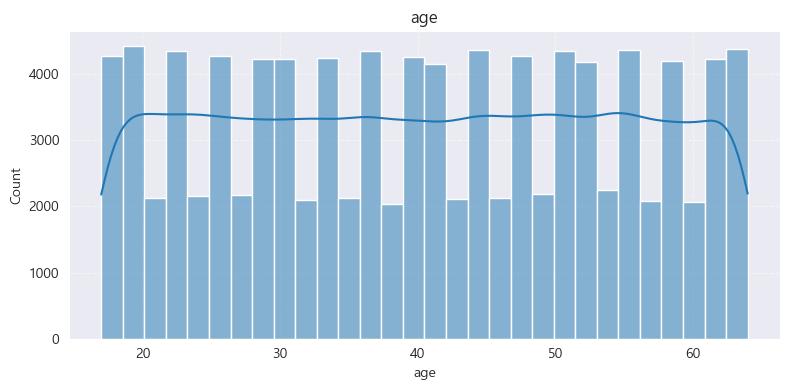

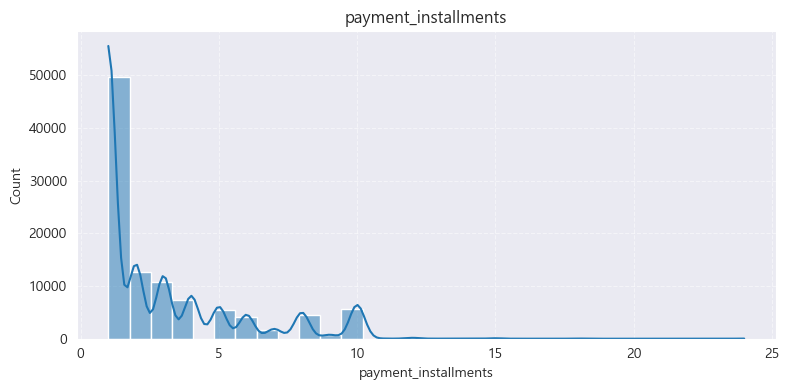

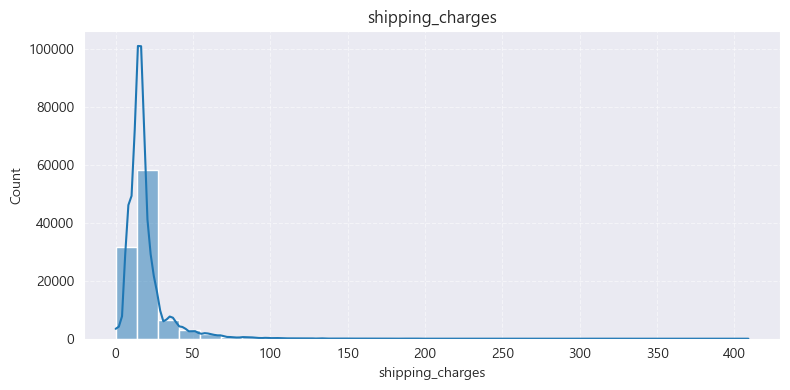

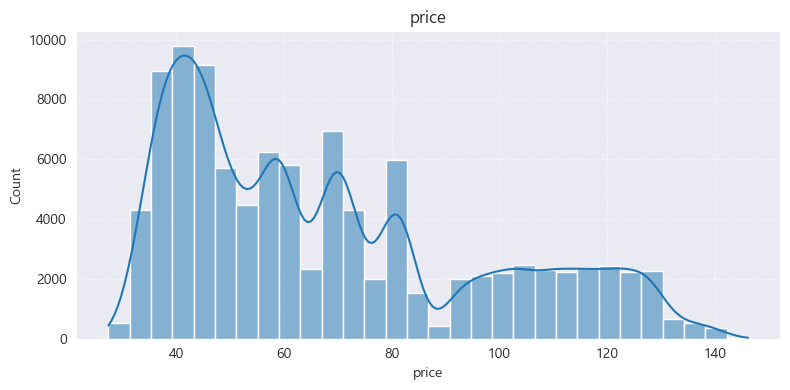

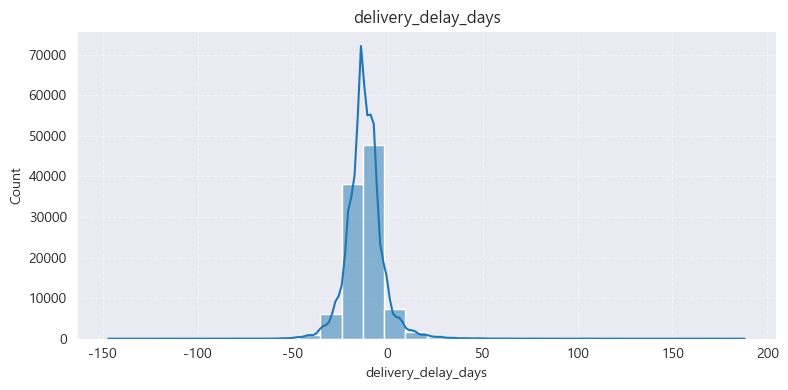

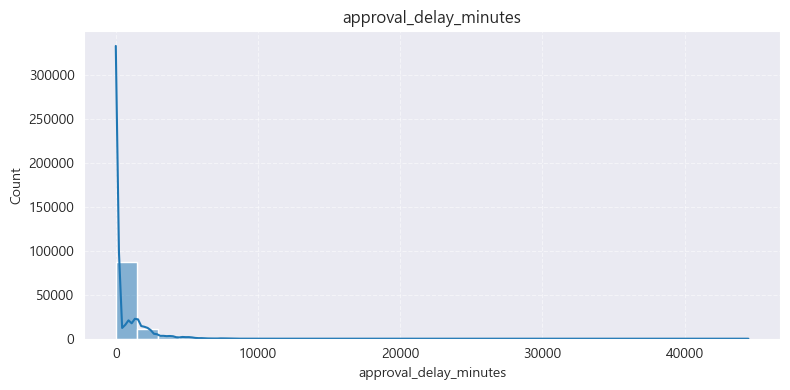

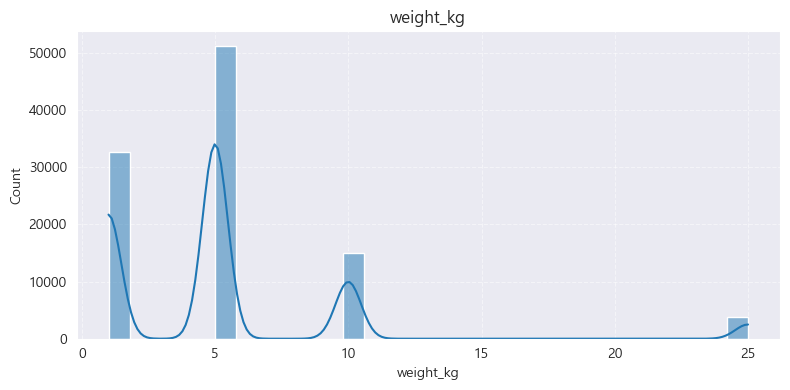

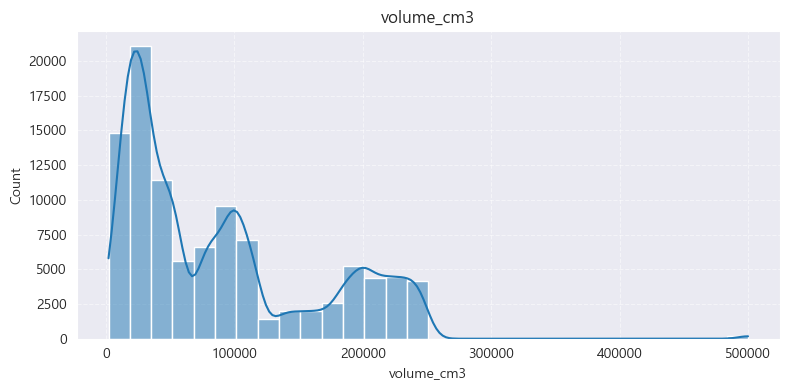

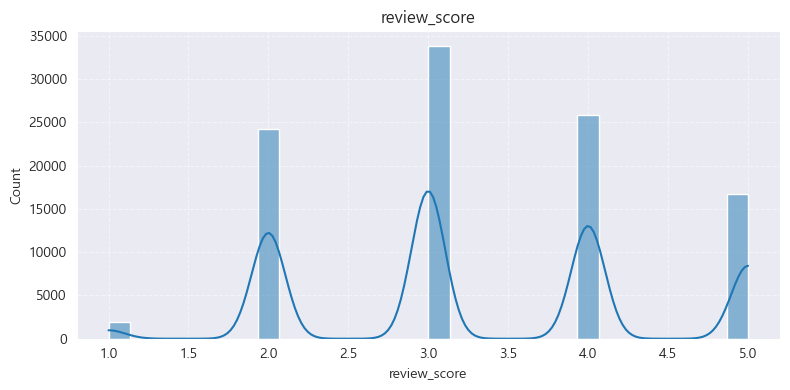

In [24]:
# ÏàòÏπòÌòï Î≥ÄÏàòÎßå Ï∂îÏ∂ú
numeric_cols = marketing_delivered.select_dtypes(include=['int64', 'float64']).columns
df_numeric = marketing_delivered[numeric_cols].dropna()

# Í∞Å Î≥ÄÏàòÎ≥Ñ Î∂ÑÌè¨ ÏãúÍ∞ÅÌôî
for col in df_numeric.columns:
    plt.figure(figsize=(8,4))
    sns.histplot(df_numeric[col], bins=30, kde=True)
    plt.title(f'{col}')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

In [25]:
# ÌååÏÉù Î≥ÄÏàò Ïª¨Îüº ÎßåÎì§Í∏∞
marketing_delivered['total_price'] = marketing_delivered['price'] + marketing_delivered['shipping_charges']
marketing_delivered['density'] = marketing_delivered['weight_kg'] / (marketing_delivered['volume_cm3'] / 1000000)
marketing_delivered['delivery_total_days'] = (marketing_delivered['order_delivered_timestamp'] - marketing_delivered['order_purchase_timestamp']).dt.days
marketing_delivered['delay_rate'] = marketing_delivered['delivery_delay_days'] / marketing_delivered['delivery_total_days']

# infÎÇò NaN Ï≤òÎ¶¨
marketing_delivered['delay_rate'].replace([np.inf, -np.inf], np.nan, inplace=True)
marketing_delivered['delay_rate'].fillna(0, inplace=True)

marketing_delivered['is_big_product'] = (
    (marketing_delivered['volume_cm3'] > 212427) |
    (marketing_delivered['weight_kg'] > 10)
).astype(int) # 1Ïù¥Î©¥ ÎåÄÌòï Î¨ºÌíà, 0Ïù¥Î©¥ ÏÜåÌòï

In [26]:
# Label encoding Î≥ÄÏàò category
# category ÌÉÄÏûÖÏùÑ item_catÏúºÎ°ú Î¨∂Ïñ¥ ÏÇ¨Ïö©
marketing_delivered['item_cat'] = marketing_delivered['category1'] + '_' + marketing_delivered['category2']
# Ïπ¥ÌÖåÍ≥†Î¶¨
le = LabelEncoder()
marketing_delivered['item_cat_encoded'] = le.fit_transform(marketing_delivered['item_cat'])
# Ïπ¥ÌÖåÍ≥†Î¶¨ ÎßµÌïë
category1_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(category1_mapping)

{'Í∞ÄÍµ¨_1Ïù∏Í∞ÄÍµ¨': 0, 'Í∞ÄÍµ¨_Í±∞Ïã§Ïû•/ÌÖåÏù¥Î∏î': 1, 'Í∞ÄÍµ¨_ÏáºÌåå': 2, 'Í∞ÄÍµ¨_ÏàòÎÇ©Ïû•/ÏÑ†Î∞ò': 3, 'Í∞ÄÍµ¨_ÏïºÏô∏Í∞ÄÍµ¨': 4, 'Í∞ÄÍµ¨_Ïò∑Ïû•/ÌñâÍ±∞': 5, 'Í∞ÄÍµ¨_Ï±ÖÏÉÅ/Ï±ÖÏû•': 6, 'Í∞ÄÍµ¨_Ïπ®ÎåÄ': 7, 'Í∞ÄÍµ¨_ÌôîÏû•ÎåÄ': 8, 'Ïä§Ìè¨Ï∏†Ïö©Ìíà_Í≥®ÌîÑ': 9, 'Ïä§Ìè¨Ï∏†Ïö©Ìíà_ÎÇöÏãú': 10, 'Ïä§Ìè¨Ï∏†Ïö©Ìíà_Îì±ÏÇ∞': 11, 'Ïä§Ìè¨Ï∏†Ïö©Ìíà_Ï∫†Ìïë': 12, 'ÏãùÌíà_Í∞ÄÍ≥µÏãùÌíà': 13, 'ÏãùÌíà_Í±¥Í∞ïÏãùÌíà': 14, 'ÏãùÌíà_Ïã†ÏÑ†ÏãùÌíà': 15, 'ÏùòÎ•ò_ÎÇ®ÏÑ±ÏùòÎ•ò': 16, 'ÏùòÎ•ò_Ïä§Ìè¨Ï∏†ÏùòÎ•ò': 17, 'ÏùòÎ•ò_Ïó¨ÏÑ±ÏùòÎ•ò': 18, 'ÏùòÎ•ò_Ïú†ÏïÑÏùòÎ•ò': 19, 'ÏùòÎ•ò_ÌååÌã∞ÏùòÎ•ò': 20, 'Ï†ÑÏûêÏ†úÌíà_Í±¥Í∞ïÍ∞ÄÏ†Ñ': 21, 'Ï†ÑÏûêÏ†úÌíà_ÎÉâÏû•Í≥†': 22, 'Ï†ÑÏûêÏ†úÌíà_ÎπÑÎç∞': 23, 'Ï†ÑÏûêÏ†úÌíà_ÏÑ∏ÌÉÅÍ∏∞/Í±¥Ï°∞Í∏∞': 24, 'Ï†ÑÏûêÏ†úÌíà_ÏùåÌñ•Í∞ÄÏ†Ñ': 25, 'Ï†ÑÏûêÏ†úÌíà_Ï£ºÎ∞©Í∞ÄÏ†Ñ': 26, 'Ï†ÑÏûêÏ†úÌíà_Ï≤≠ÏÜåÍ∏∞': 27, 'ÌôîÏû•Ìíà_ÎÇ®ÏÑ±ÌôîÏû•Ìíà': 28, 'ÌôîÏû•Ìíà_ÎÑ§ÏùºÏºÄÏñ¥': 29, 'ÌôîÏû•Ìíà_ÎßàÏä§ÌÅ¨/Ìå©': 30, 'ÌôîÏû•Ìíà_Î©îÏù¥ÌÅ¨ÏóÖ': 31, 'ÌôîÏû•Ìíà_Î∞îÎîîÏºÄÏñ¥': 32, 'ÌôîÏû•Ìíà_ÏÑ†ÏºÄÏñ¥': 33, 'ÌôîÏû•Ìíà_Ïä§ÌÇ®ÏºÄÏñ¥'

In [27]:
# ÎßàÏºÄÌåÖ y = 1 n = 0ÏúºÎ°ú Î≥ÄÌôò
marketing_delivered['marketing_info_agree'] = marketing_delivered['marketing_info_agree'].map({'y': 1, 'n': 0})

In [28]:
# ÏôúÎèÑ ÏôÑÌôî Î∞è Ï†ïÍ∑úÌôî/ÌëúÏ§ÄÌôî
# logÎ°ú Î≥ÄÌôòÌï† Ïª¨Îüº Î™©Î°ù
logs_cols = [
    'shipping_charges',
    'total_price',
    'approval_delay_minutes',
    'density',
    'delivery_total_days'
]
# logÏóêÏÑú stdÎ°ú Î≥ÄÌôòÌï† Ïª¨Îüº Î™©Î°ù
stdlog_cols = [
    'shipping_charges', # Î°úÍ∑∏ Î≥ÄÌôòÌñàÏñ¥ÎèÑ Ïó¨Ï†ÑÌûà ÏàòÏπò Ï∞®Ïù¥ Ï°¥Ïû¨. Îã§Î•∏ Î≥ÄÏàòÏôÄ ÏòÅÌñ•Î†• ÎßûÏ∂îÍ∏∞ ÏúÑÌï¥ ÌëúÏ§ÄÌôî ÌïÑÏöî
    'total_price', # Íµ¨Îß§ Í∏àÏï°ÏùÄ ÏàòÏ≤ú~ÏàòÏã≠Îßå ÏõêÍπåÏßÄ Îß§Ïö∞ ÌÅº. Ï†ïÍ∑úÌôî ÏóÜÏù¥ Ïì∞Î©¥ Í±∞Î¶¨ Í≥ÑÏÇ∞ Ïãú Ïù¥ Í∞í ÌïòÎÇòÍ∞Ä Íµ∞ÏßëÏùÑ Í≤∞Ï†ïÌï¥Î≤ÑÎ¶º
    'approval_delay_minutes', # Î∂Ñ Îã®ÏúÑ ÏàòÏ≤úÍπåÏßÄ Ï°¥Ïû¨ ‚Üí ÌèâÍ∑† 0, Î∂ÑÏÇ∞ 1Î°ú ÎßûÏ∂îÏßÄ ÏïäÏúºÎ©¥ Ï†ÑÏ≤¥ Í±∞Î¶¨ Íµ¨Ï°∞ ÏôúÍ≥°
    'density', # Îã®ÏúÑÍ∞Ä Î≥µÏû°ÌïòÍ≥† ÏàòÏπò Ìè≠ ÎÑìÏùå. Îã§Î•∏ Î≥ÄÏàòÎì§Í≥º Í±∞Î¶¨ Í≥ÑÏÇ∞ Ïãú Í≥ºÎåÄÎ∞òÏòÅ Î∞©ÏßÄ
    'delivery_total_days' # delivery_delay_daysÏôÄ ÎπÑÏä∑Ìïú Í∞íÏûÑÏúºÎ°ú ÏùåÏàò ÏñëÏàòÎ•º Ìè¨Ìï®ÌïòÍ≥† ÏûàÏùå.
]
# stdÎ°ú Î≥ÄÌôòÌï† Ïª¨Îüº Î™©Î°ù
std_cols = [
    'payment_installments', # ÎåÄÎ∂ÄÎ∂Ñ 1, ÏùºÎ∂Ä 12Í∞úÏõî Îì± Í∑πÎã® Í∞í Ï°¥Ïû¨. ÌëúÏ§ÄÌôî ÏóÜÏù¥ Ïì∞Î©¥ ÎπÑÏ†ïÏÉÅÏ†ÅÏúºÎ°ú Í∑∏Î£π ÎÇòÎâ† Ïàò ÏûàÏùå
    'delivery_delay_days', # ÏùåÏàò~ÏñëÏàò Ìè¨Ìï®. Ï§ëÏã¨ÏùÑ 0ÏúºÎ°ú ÎëêÍ≥† ÌëúÏ§ÄÌé∏Ï∞® ÎßûÏ∂îÎ©¥ Î∂ÑÌè¨Í∞Ä Ïûò Î∞òÏòÅÎê®
    'delay_rate',
    'item_cat_encoded',
    'marketing_info_agree',
    'is_big_product',
    'review_score',
    'price',
    'volume_cm3',
    'weight_kg',
    'age'
]

In [29]:
for col in logs_cols:
    marketing_delivered['log_' + col] = marketing_delivered[col].apply(
        lambda x: np.log1p(x) if x > -1 else 0  # 0 Í∞íÏúºÎ°ú ÎåÄÏ≤¥
)

scaler = StandardScaler()
for col in stdlog_cols:
    marketing_delivered['std_' + col] = scaler.fit_transform(marketing_delivered[['log_' + col]])
for col in std_cols:
    marketing_delivered['std_' + col] = scaler.fit_transform(marketing_delivered[[col]])

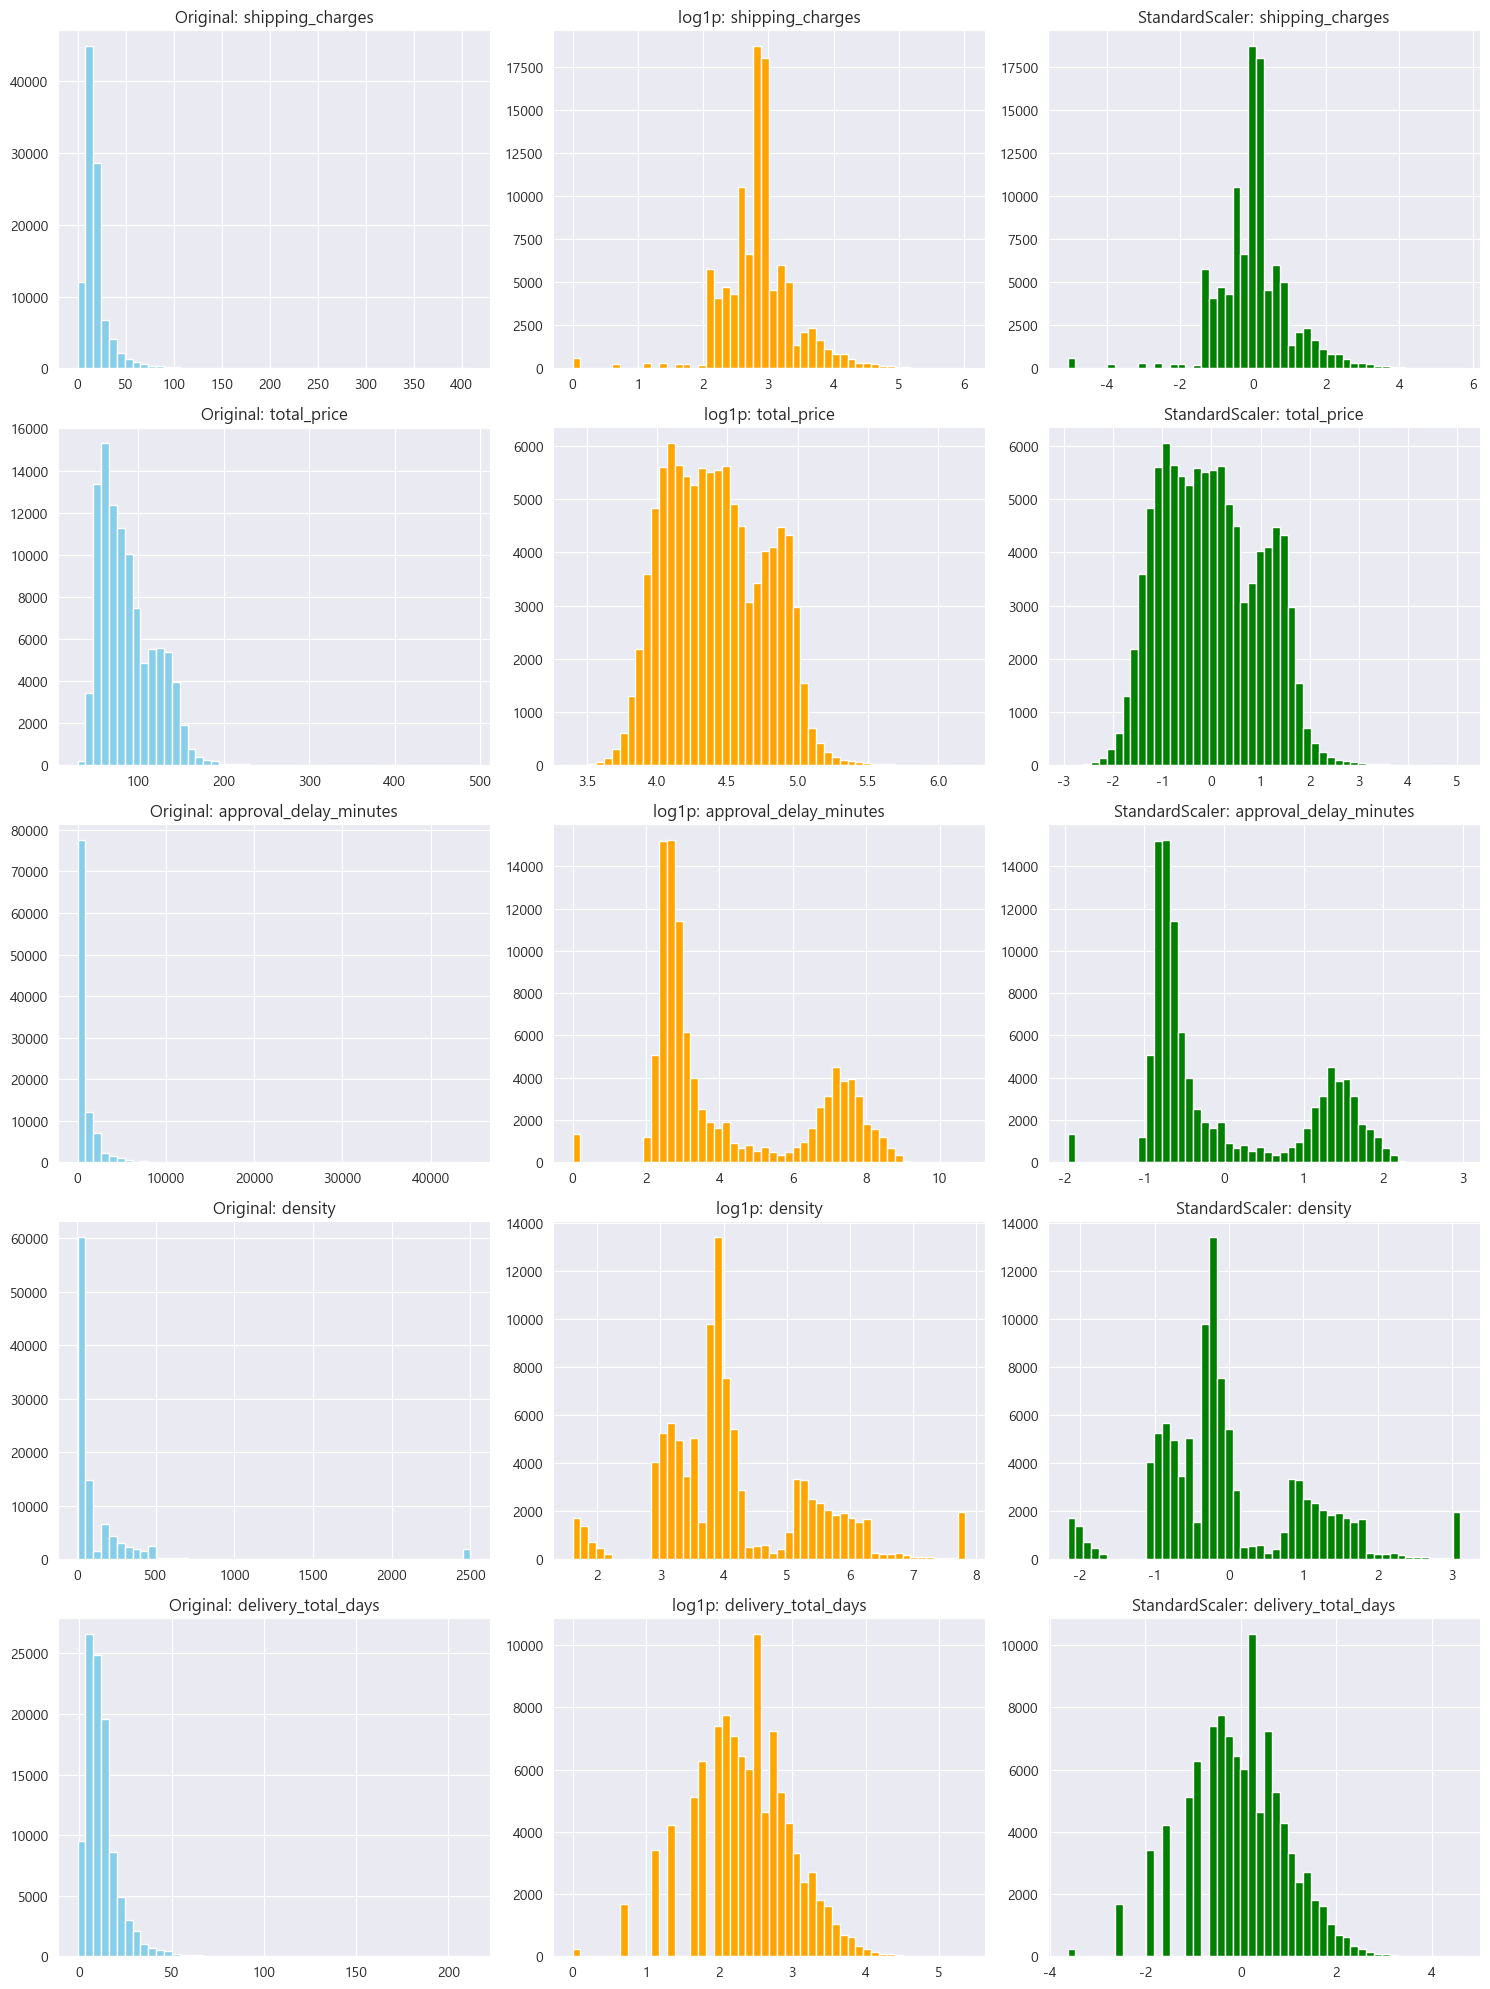

In [30]:
# Ï∞®Ìä∏Î°ú ÏãúÍ∞ÅÌôî (Î°úÍ∑∏ Ï†Ñ/ÌõÑ, ÌëúÏ§ÄÌôî Ï†Ñ/ÌõÑ ÎπÑÍµê)
# ÌëúÏ§ÄÌôîÎäî Í±∞Î¶¨ Í∏∞Î∞ò Í≥ÑÏÇ∞ÏùÑ ÏúÑÌïú Ïä§ÏºÄÏùº ÌÜµÏùº Î™©Ï†Å
fig, axes = plt.subplots(len(logs_cols), 3, figsize=(15, 4 * len(logs_cols)))

for i, col in enumerate(logs_cols):
    # ÏõêÎ≥∏
    axes[i, 0].hist(marketing_delivered[col].dropna(), bins=50, color='skyblue')
    axes[i, 0].set_title(f"Original: {col}")

    # Î°úÍ∑∏ Î≥ÄÌôò
    axes[i, 1].hist(marketing_delivered['log_' + col].dropna(), bins=50, color='orange')
    axes[i, 1].set_title(f"log1p: {col}")

    # ÌëúÏ§ÄÌôî
    if col in stdlog_cols:
        axes[i, 2].hist(marketing_delivered['std_' + col].dropna(), bins=50, color='green')
        axes[i, 2].set_title(f"StandardScaler: {col}")
    else:
        axes[i, 2].axis('off')

plt.tight_layout()
plt.savefig(os.path.join(save_dir, "orilogstd.png"), dpi=300)
plt.show()

In [31]:
marketing_delivered.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_timestamp', 'order_estimated_delivery_date', 'age', 'gender', 'country', 'payment_type', 'payment_installments', 'seller_id', 'shipping_charges', 'category1', 'category2', 'price', 'delivery_delay_days', 'approval_delay_minutes', 'weight_kg', 'volume_cm3', 'review_score', 'marketing_info_agree', 'agegroup', 'product_id', 'total_price', 'density', 'delivery_total_days', 'delay_rate', 'is_big_product', 'item_cat', 'item_cat_encoded', 'log_shipping_charges', 'log_total_price', 'log_approval_delay_minutes', 'log_density', 'log_delivery_total_days', 'std_shipping_charges', 'std_total_price', 'std_approval_delay_minutes', 'std_density', 'std_delivery_total_days', 'std_payment_installments', 'std_delivery_delay_days', 'std_delay_rate', 'std_item_cat_encoded', 'std_marketing_info_agree', 'std_is_big_product', 'std_review_score', 'std_price', 'std_volume_cm3', 'std_weight_kg',
   

In [42]:
df_mixed = marketing_delivered[[
    'std_delivery_delay_days',
    'std_delivery_total_days',
    'std_approval_delay_minutes',
    'review_score',
    'std_delay_rate'
]]

In [47]:
# ÌûàÌä∏ÎßµÏùÑ ÏúÑÌïú ÌïÑÏöîÌïú Ïª¨ÎüºÎßå Ï∂îÏ∂ú
selected_cols = [
    'gender', 'country', 'payment_type', 'payment_installments', 'seller_id', 'shipping_charges', 'category1', 'category2', 'price', 'delivery_delay_days', 'approval_delay_minutes', 'weight_kg', 'volume_cm3', 'review_score', 'marketing_info_agree', 'agegroup', 'product_id'
]

# ÏÑ†ÌÉùÎêú Ïó¥Îßå Ï∂îÏ∂ú
df_selected = marketing_delivered[selected_cols].copy()

# Label Encoding
label_enc = LabelEncoder()
for col in df_selected.columns:
    if df_selected[col].dtype == 'object' or str(df_selected[col].dtype).startswith('category'):
        df_selected[col] = label_enc.fit_transform(df_selected[col].astype(str))

In [34]:
# Î¨∏ÏûêÏó¥ ÌÉÄÏûÖ Ïª¨Îüº Ï†úÍ±∞ÌïòÍ≥† ÏÉÅÍ¥ÄÍ≥ÑÏàò Í≥ÑÏÇ∞
numeric_df = df_selected.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()

# 0.5 Ï¥àÍ≥ºÏù¥Í≥† 1.0 ÎØ∏ÎßåÏù∏ Ï°∞Ìï© Ï∂îÏ∂ú
high_corr = []
for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        corr_val = corr_matrix.iloc[i, j]
        if 0.5 <= abs(corr_val) < 0.99:
            high_corr.append((
                corr_matrix.columns[i],
                corr_matrix.columns[j],
                corr_val
            ))

# Í≤∞Í≥º Ï∂úÎ†•
high_corr_df = pd.DataFrame(high_corr, columns=['Feature 1', 'Feature 2', 'Correlation'])
display(high_corr_df.sort_values(by='Correlation', ascending=False))

Feature 1               Feature 2  Correlation
0           age                agegroup     0.966945
2         price              volume_cm3     0.625053
1  payment_type  approval_delay_minutes     0.528885

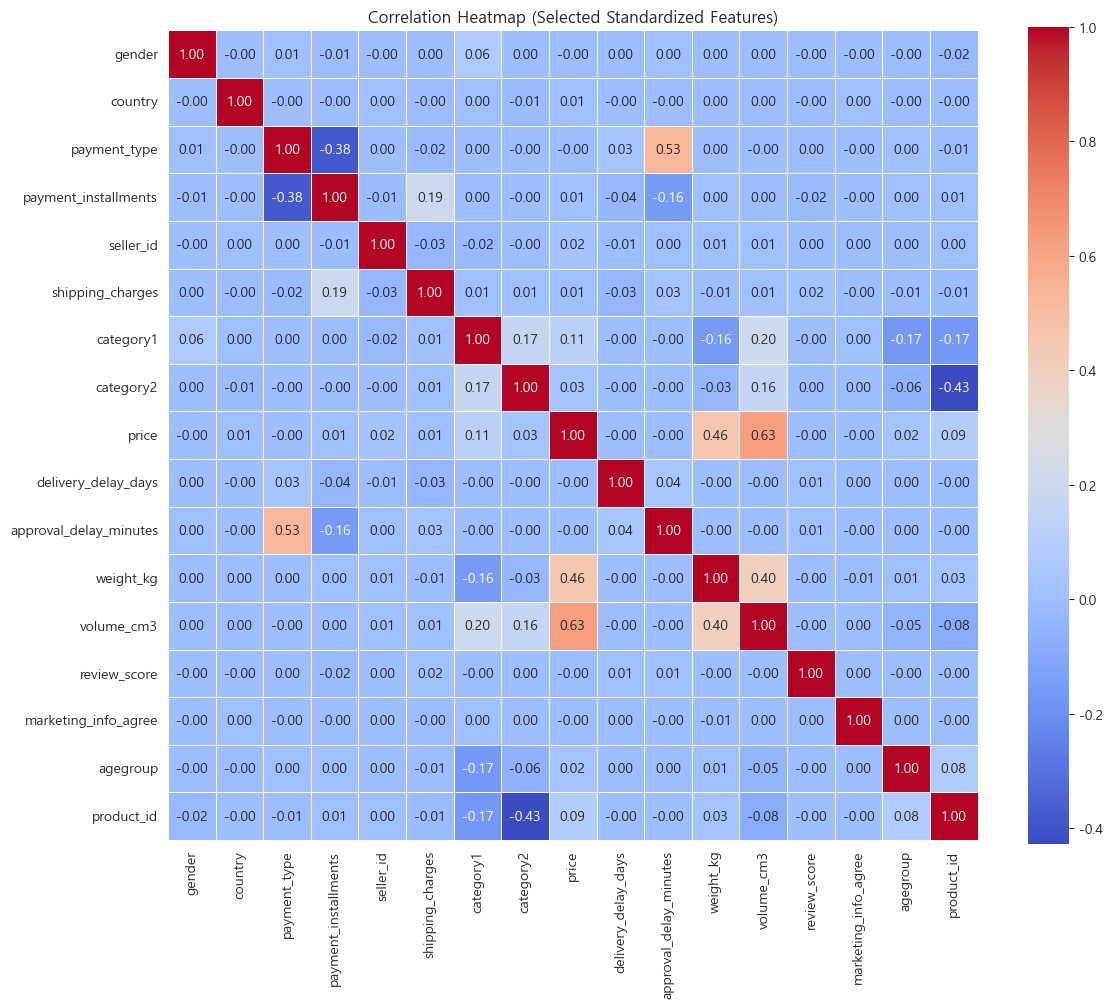

In [48]:
# ÏÑ†ÌÉùÌïú Ïª¨ÎüºÎßå Ï∂îÏ∂ú
df_corr = df_selected[selected_cols]

# ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÌûàÌä∏Îßµ
plt.figure(figsize=(12, 10))
sns.heatmap(df_corr.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title("Correlation Heatmap (Selected Standardized Features)")
plt.tight_layout()
plt.savefig(os.path.join(save_dir, "heatmapmix.png"), dpi=300)
plt.show()

In [34]:
def plot_cluster_bar_ratio(df, column, cluster_col, order=None):

    count_df = df.groupby([cluster_col, column]).size().reset_index(name='count')
    count_df['percentage'] = count_df['count'] / count_df.groupby(cluster_col)['count'].transform('sum') * 100

    # ÏãúÍ∞ÅÌôî
    plt.figure(figsize=(10, 6))
    sns.barplot(data=count_df, x=column, y='percentage', hue=cluster_col, order=order, palette='Set2')
    plt.title(f'ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ {column} Î∂ÑÌè¨ (ÎπÑÏú® %)')
    plt.xlabel(column)
    plt.ylabel('ÎπÑÏú® (%)')
    plt.legend(title='ÌÅ¥Îü¨Ïä§ÌÑ∞')
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.savefig(os.path.join(save_dir, f"{cluster_col}{column}ratio.png"), dpi=300)
    plt.show()

In [53]:
def plot_cluster_mean_bar(df, numeric_col, cluster_col='cluster'):
    cluster_means = df.groupby(cluster_col)[numeric_col].mean().reset_index()

    plt.figure(figsize=(8,5))
    sns.barplot(data=cluster_means, x=cluster_col, y=numeric_col, hue=cluster_col, palette='Set2')
    plt.title(f'{numeric_col} by {cluster_col}')
    plt.ylabel(f'{numeric_col}')
    plt.xlabel('ÌÅ¥Îü¨Ïä§ÌÑ∞')
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.show()

# 4 ÌòºÌï© ÌÅ¥Îü¨Ïä§ÌÑ∞

In [35]:
df_mixed.isnull().sum()

std_delivery_delay_days       0
std_delivery_total_days       0
std_approval_delay_minutes    0
review_score                  0
std_delay_rate                0
dtype: int64

In [43]:
df_mixed = df_mixed[[
    'std_delivery_delay_days',
    'std_delivery_total_days',
    'std_approval_delay_minutes',
    'review_score',
    'std_delay_rate'
]]

In [37]:
df_mixed.describe()

std_delivery_delay_days  std_delivery_total_days  std_approval_delay_minutes   review_score  std_delay_rate
count             1.026160e+05             1.026160e+05                1.026160e+05  102616.000000    1.026160e+05
mean             -3.368666e-17             4.576954e-17                2.624305e-17       3.303598    1.109271e-16
std               1.000005e+00             1.000005e+00                1.000005e+00       1.059952    1.000005e+00
min              -1.323265e+01            -3.631322e+00               -1.961619e+00       1.000000   -2.026885e+01
25%              -4.908350e-01            -6.418278e-01               -7.458171e-01       2.000000   -2.190238e-01
50%              -9.877907e-02             5.255513e-02               -5.590211e-01       3.000000    2.394497e-01
75%               4.893049e-01             6.281952e-01                1.148583e+00       4.000000    5.634251e-01
max               1.960203e+01             4.605210e+00                2.969194e+00       5.000000    8.145321e+00

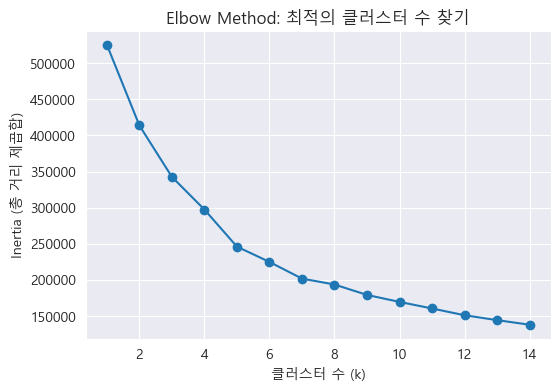

In [44]:
# Elbow Method: ÏµúÏ†ÅÏùò ÌÅ¥Îü¨Ïä§ÌÑ∞ Ïàò Ï∞æÍ∏∞
inertia = []
K_range = range(1, 15)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_mixed)
    inertia.append(kmeans.inertia_)

# Elbow ÏãúÍ∞ÅÌôî
plt.figure(figsize=(6, 4))
plt.plot(K_range, inertia, marker='o')
plt.title("Elbow Method: ÏµúÏ†ÅÏùò ÌÅ¥Îü¨Ïä§ÌÑ∞ Ïàò Ï∞æÍ∏∞")
plt.xlabel("ÌÅ¥Îü¨Ïä§ÌÑ∞ Ïàò (k)")
plt.ylabel("Inertia (Ï¥ù Í±∞Î¶¨ Ï†úÍ≥±Ìï©)")
plt.grid(True)
plt.savefig(os.path.join(save_dir, f"4cluelbow"), dpi=300)
plt.show()

In [39]:
# Silhouette Score Í≥ÑÏÇ∞ Î∞è ÏãúÍ∞ÅÌôî
scores = []
k_range = range(2, 9)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    labels = kmeans.fit_predict(df_mixed)
    score = silhouette_score(df_mixed, labels)
    scores.append(score)

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8, 5))
plt.plot(k_range, scores, marker='o')
plt.title("Silhouette Score: ÏµúÏ†ÅÏùò ÌÅ¥Îü¨Ïä§ÌÑ∞ Ïàò Ï∞æÍ∏∞")
plt.xlabel("ÌÅ¥Îü¨Ïä§ÌÑ∞ Ïàò (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.xticks(k_range)
plt.savefig(os.path.join(save_dir, f"4clusilhouette"), dpi=300)
plt.show()


KeyboardInterrupt



In [46]:
# Í≥†Í∞ù ÏÑ∏Í∑∏Î©òÌÖåÏù¥ÏÖò (KMeans ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ)
kmeans = KMeans(n_clusters=4, random_state=42)
df_mixed.loc[:, 'Cluster'] = kmeans.fit_predict(df_mixed)

In [47]:
# Íµ∞ÏßëÎ≥Ñ ÏÉòÌîå Ïàò
df_mixed['Cluster'].value_counts().sort_index()

Cluster
0    28493
1    14687
2    29196
3    30240
Name: count, dtype: int64

In [38]:
# Î≥ÄÏàòÎ≥Ñ ÏãúÍ∞ÅÌôî
marketing_delivered['cluster'] = df_mixed['Cluster'].values
plot_cluster_bar_ratio(marketing_delivered, 'payment_type', 'cluster')
plot_cluster_mean_bar(marketing_delivered, 'total_price')
plot_cluster_mean_bar(marketing_delivered, 'density')
plot_cluster_mean_bar(marketing_delivered, 'is_big_product')

NameError: name 'plot_cluster_bar_ratio' is not defined

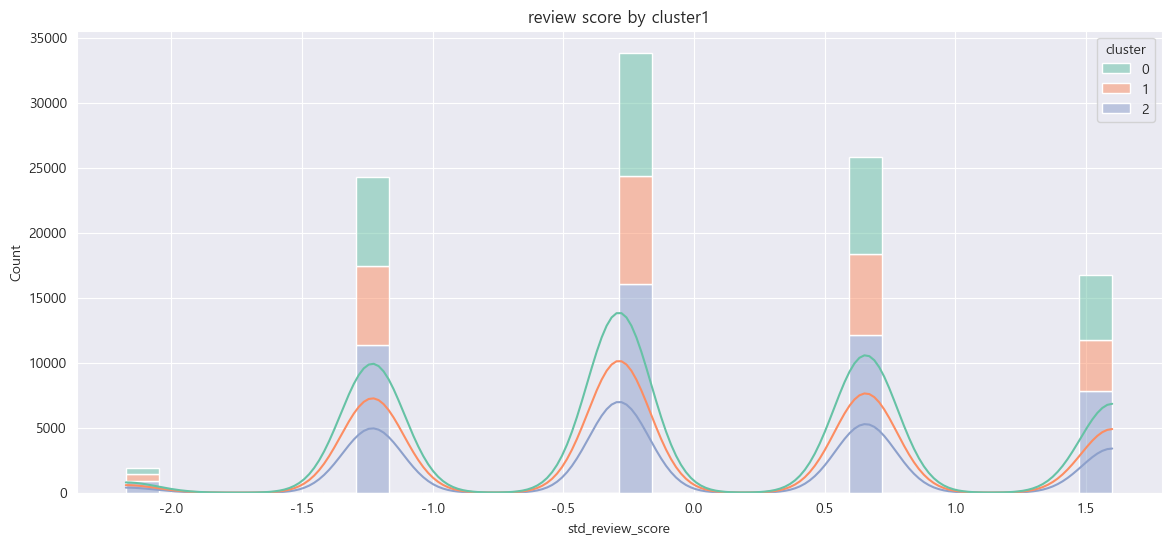

In [86]:
plt.figure(figsize=(14,6))
sns.histplot(data= marketing_delivered, x= 'std_review_score', hue='cluster', bins=30, kde=True, palette='Set2', multiple='stack')
plt.title('review score by cluster')
plt.show()

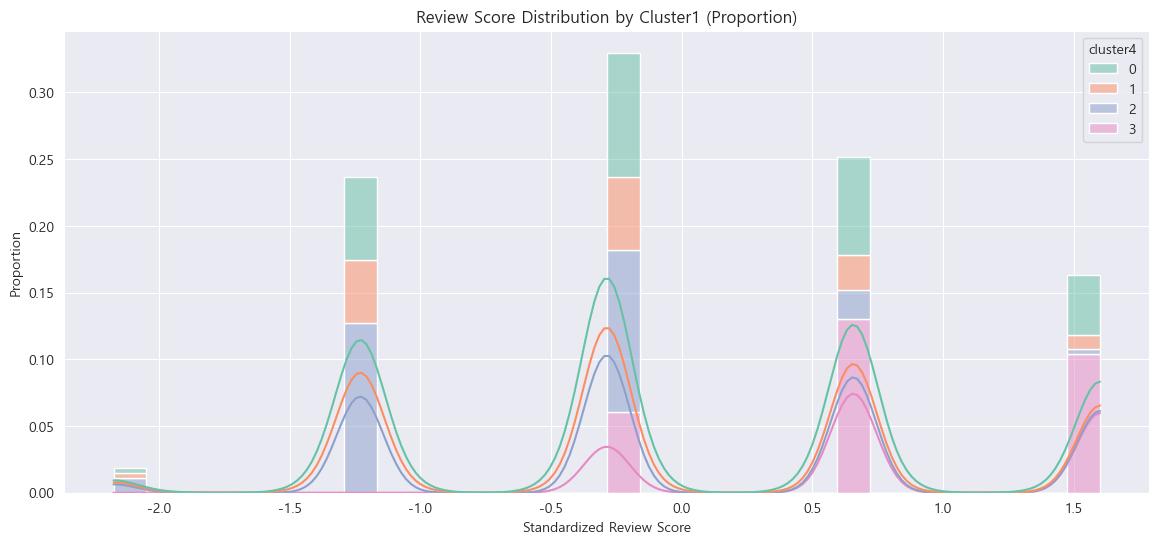

In [93]:
plt.figure(figsize=(14,6))
sns.histplot(
    data=marketing_delivered,
    x='std_review_score',
    hue='cluster',  # ÏõêÌïòÎäî ÌÅ¥Îü¨Ïä§ÌÑ∞ Ïª¨Îüº
    bins=30,
    kde=True,
    palette='Set2',
    multiple='stack',
    stat='probability'  # üëâ ÎπÑÏ§ëÏúºÎ°ú ÌëúÏãú
)
plt.title('Review Score Distribution by Cluster1 (Proportion)')
plt.xlabel('Standardized Review Score')
plt.ylabel('Proportion')
plt.show()

In [39]:
# Ï†êÏàò Íµ¨Í∞Ñ ÎÇòÎàÑÍ∏∞
bins = pd.cut(marketing_delivered['std_review_score'], bins=10)

# ÎπÑÏú® Í≥ÑÏÇ∞ (DataFrame ÌòïÌÉúÎ°ú Î∞òÌôò)
proportion_df = (
    marketing_delivered
    .groupby(['cluster', bins])
    .size()
    .groupby(level=0)
    .apply(lambda x: x / x.sum())
    .unstack()
)
# Í≤∞Í≥º Ï∂úÎ†•
proportion_df

C:\Users\sasan\AppData\Local\Temp\ipykernel_23900\2920886412.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['cluster', bins])


std_review_score  (-2.177, -1.796]  (-1.796, -1.419]  (-1.419, -1.041]  (-1.041, -0.664]  (-0.664, -0.286]  (-0.286, 0.0909]  (0.0909, 0.468]  (0.468, 0.846]  (0.846, 1.223]  (1.223, 1.6]
cluster cluster                                                                                                                                                                            
0       0                 0.018687               0.0          0.231720               0.0          0.322695               0.0              0.0        0.257816             0.0      0.169082
1       1                 0.019522               0.0          0.246830               0.0          0.333333               0.0              0.0        0.245372             0.0      0.154942
2       2                 0.017552               0.0          0.234800               0.0          0.332597               0.0              0.0        0.250395             0.0      0.164657
3       3                 0.019284               0.0          0.237743               0.0          0.332231               0.0              0.0        0.250294             0.0      0.160448

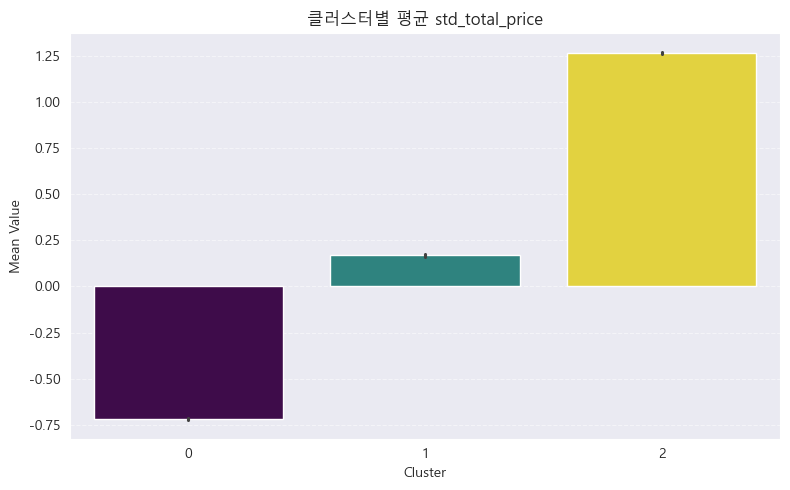

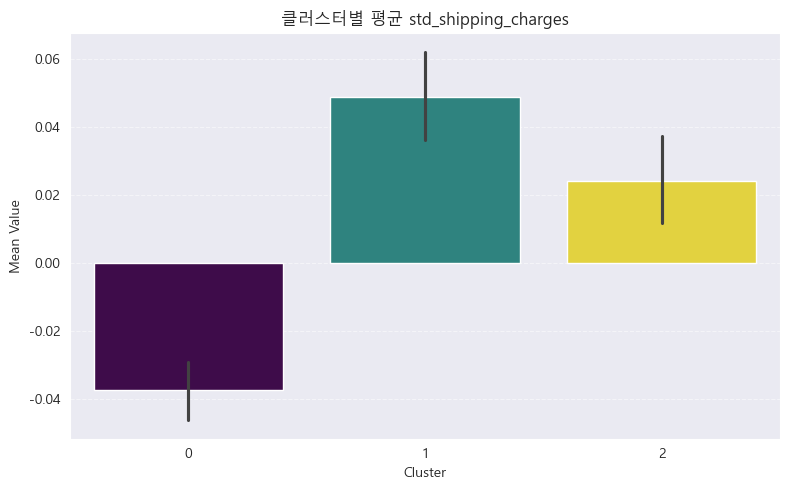

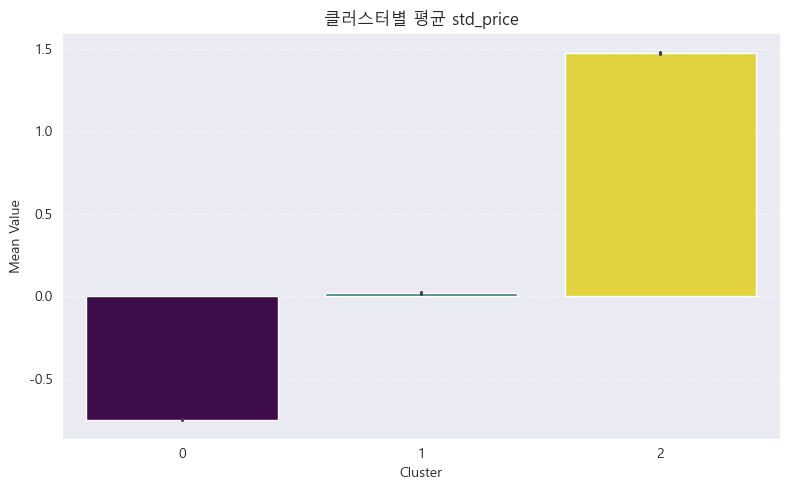

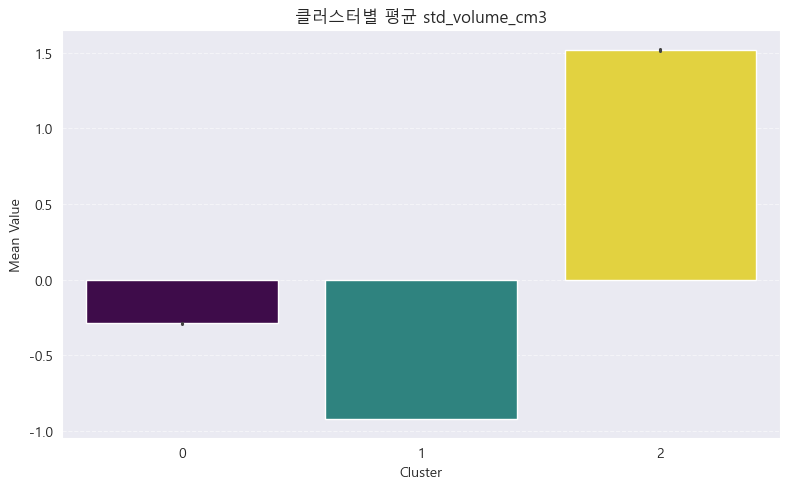

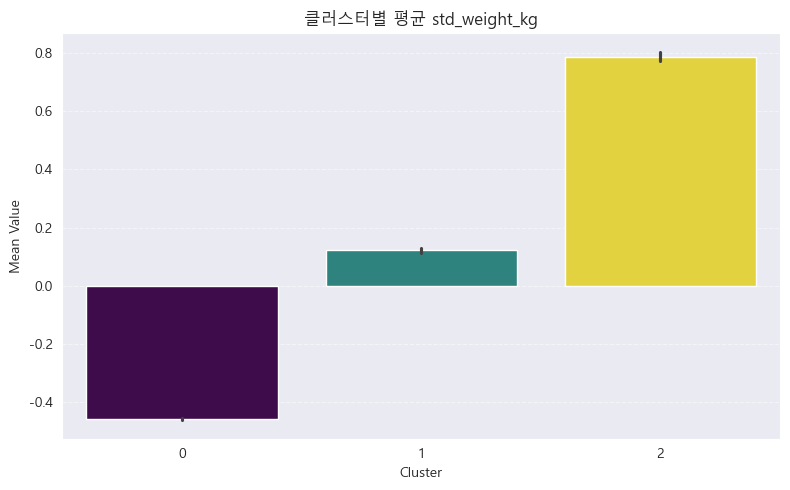

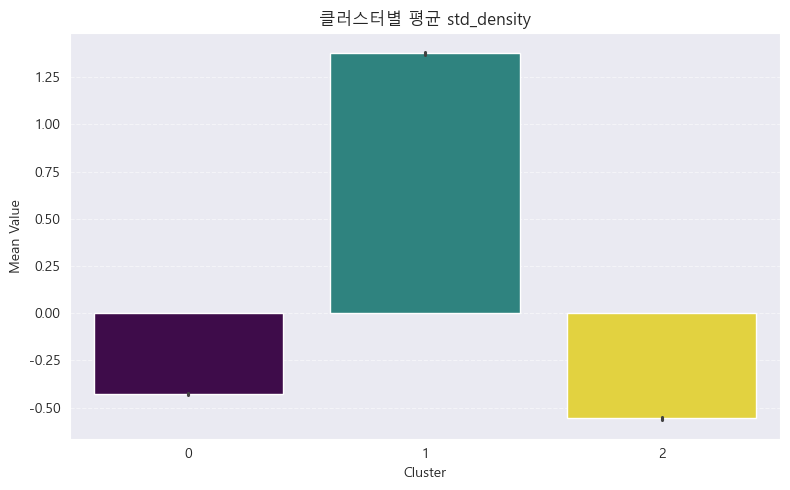

In [47]:
# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÌèâÍ∑†Í∞í Î∞î Ï∞®Ìä∏ ÏãúÍ∞ÅÌôî
# ÌÅ¥Îü¨Ïä§ÌÑ∞ Ïª¨ÎüºÏù¥ ÏûàÎäî Í≤ΩÏö∞, Í∑∏ Ïô∏ ÏàòÏπòÌòï Ïª¨ÎüºÎßå ÏÑ†ÌÉù
numeric_cols = df_mixed.select_dtypes(include='number').drop(columns='Cluster', errors='ignore').columns

for col in numeric_cols:
    plt.figure(figsize=(8, 5))
    sns.barplot(data=df_mixed, x='Cluster', y=col, hue='Cluster', palette='viridis', legend=False)
    plt.title(f'ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÌèâÍ∑† {col}')
    plt.xlabel('Cluster')
    plt.ylabel('Mean Value')
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.savefig(os.path.join(save_dir, f"4clu{col}bar"), dpi=300)
    plt.show()

In [48]:
# Íµ∞ÏßëÎ≥Ñ ÌèâÍ∑† Í∞íÎ≥¥Í∏∞
cluster_profile = df_mixed.groupby('Cluster').mean().round(2)
print(cluster_profile)

         std_delivery_delay_days  std_delivery_total_days  std_approval_delay_minutes  review_score  std_delay_rate
Cluster                                                                                                            
0                           0.08                     0.24                        1.44          3.34            0.29
1                          -0.68                    -1.38                       -0.33          2.95           -1.71
2                           0.48                     0.57                       -0.59          2.57            0.49
3                          -0.21                    -0.10                       -0.62          4.15            0.08


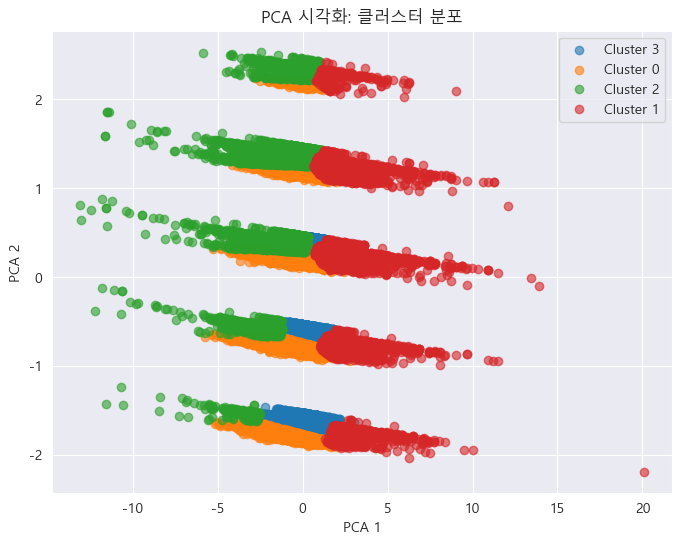

In [49]:
# 2D ÏãúÍ∞ÅÌôîÎ•º ÏúÑÌïú Ï∞®Ïõê Ï∂ïÏÜå
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_mixed.drop('Cluster', axis=1))

df_mixed.loc[:, 'pca1'] = pca_result[:, 0]
df_mixed.loc[:, 'pca2'] = pca_result[:, 1]

# ÏÇ∞Ï†êÎèÑ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8, 6))
for cluster_id in df_mixed['Cluster'].unique():
    subset = df_mixed[df_mixed['Cluster'] == cluster_id]
    plt.scatter(subset['pca1'], subset['pca2'], label=f'Cluster {cluster_id}', alpha=0.6)
plt.legend()
plt.title('PCA ÏãúÍ∞ÅÌôî: ÌÅ¥Îü¨Ïä§ÌÑ∞ Î∂ÑÌè¨')
plt.legend(loc='upper right')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)
plt.savefig(os.path.join(save_dir, f"4clukmean"), dpi=300)
plt.show()

In [50]:
# ÌòπÏãúÎùºÎèÑ PCA Ï†ÑÏóê cluster Ïª¨ÎüºÏù¥ ÏûàÏóàÎäîÏßÄ
print(df_mixed.columns)

# ÌòπÏãú logÎÇò std ÌïòÍ∏∞ Ï†Ñ ÏõêÎ≥∏ Ïª¨ÎüºÏù¥ ÏÑûÏó¨ ÏûàÏóàÎäîÏßÄ
# Ïòà: total_price, density, shipping_charges Îì±

# PCA 2 Î∞©Ìñ•Ïùò ÏõêÏù∏ Ï∂îÏ†ï
# PCA ÏàòÌñâÏóê ÏÇ¨Ïö©Ìïú Ïã§Ï†ú Ïª¨Îüº (Ïòà: ÌÅ¥Îü¨Ïä§ÌÑ∞, pca1, pca2, Îì± Ï†úÏô∏)
pca_input_cols = [
    'std_total_price',
    'std_price',
    'std_shipping_charges',
    'std_payment_installments',
    'std_delivery_delay_days',
    'std_delivery_total_days'
]

# PCA components Ìï¥ÏÑù
loadings = pd.DataFrame(pca.components_.T,
                        columns=['PCA1', 'PCA2'],
                        index=pca_input_cols)

print(loadings.sort_values('PCA2', ascending=False).head())

Index(['std_total_price', 'std_shipping_charges', 'std_price', 'std_volume_cm3', 'std_weight_kg', 'std_density', 'Cluster', 'pca1', 'pca2'], dtype='object')
                             PCA1      PCA2
std_delivery_total_days -0.039236  0.808588
std_delivery_delay_days  0.379584  0.436920
std_total_price          0.550510  0.069819
std_price                0.130572  0.042132
std_shipping_charges     0.559840  0.005538


In [51]:
print(pca.explained_variance_ratio_)

[0.45257442 0.24042258]


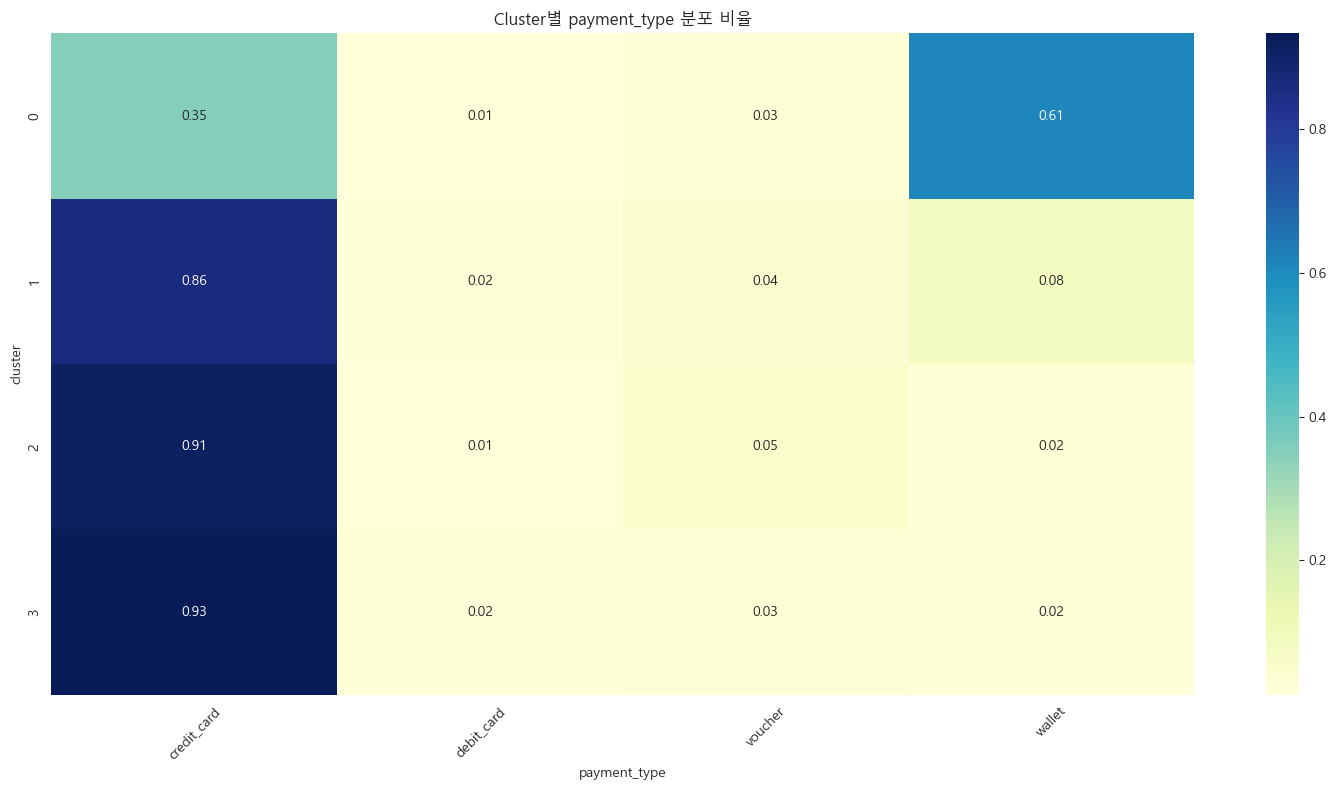

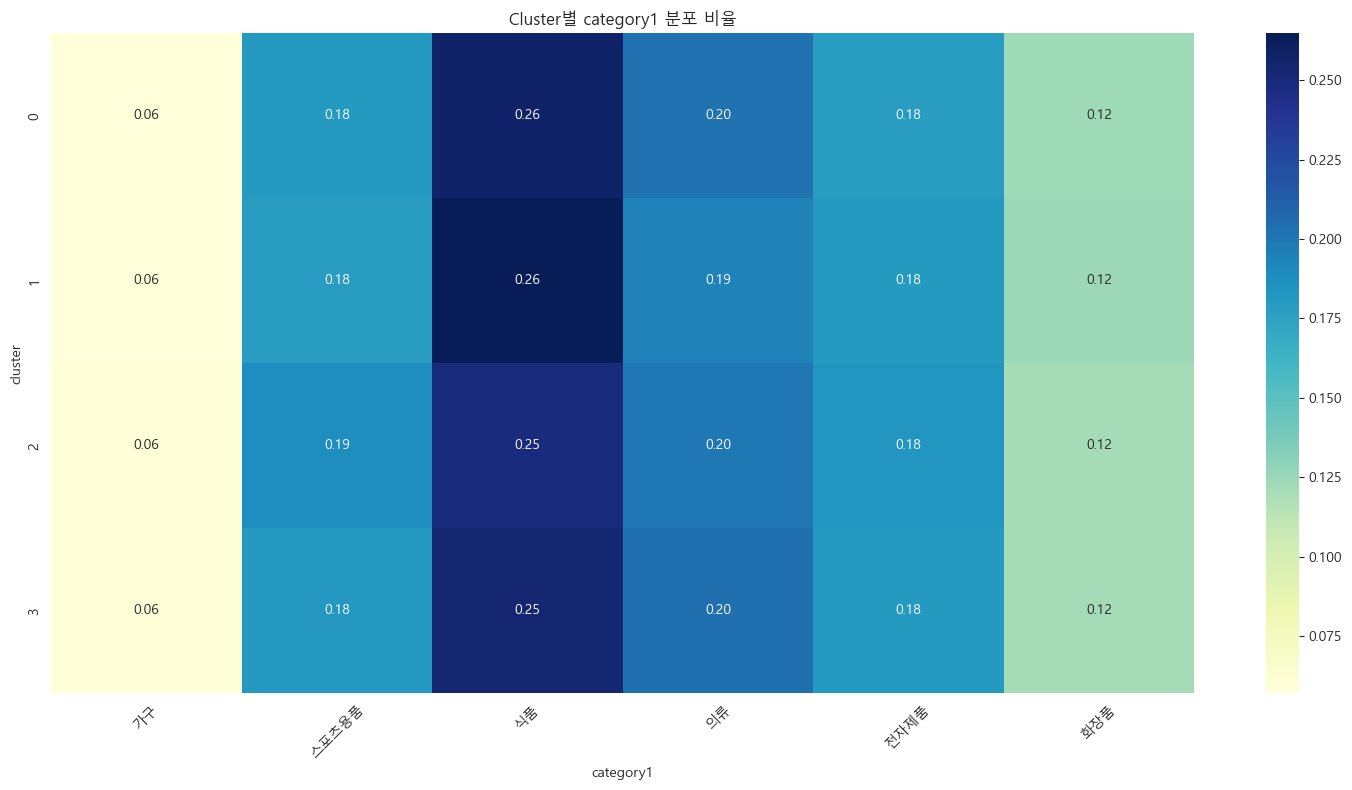

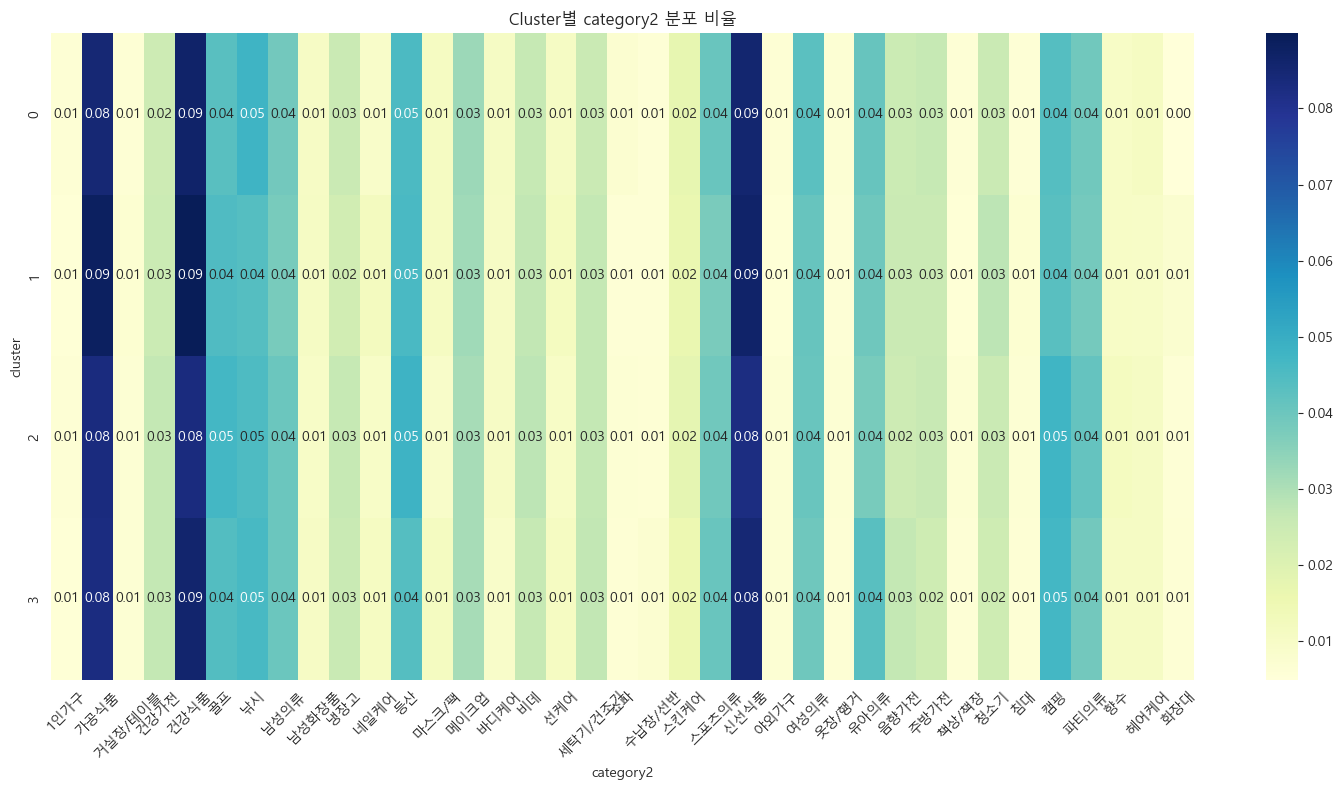

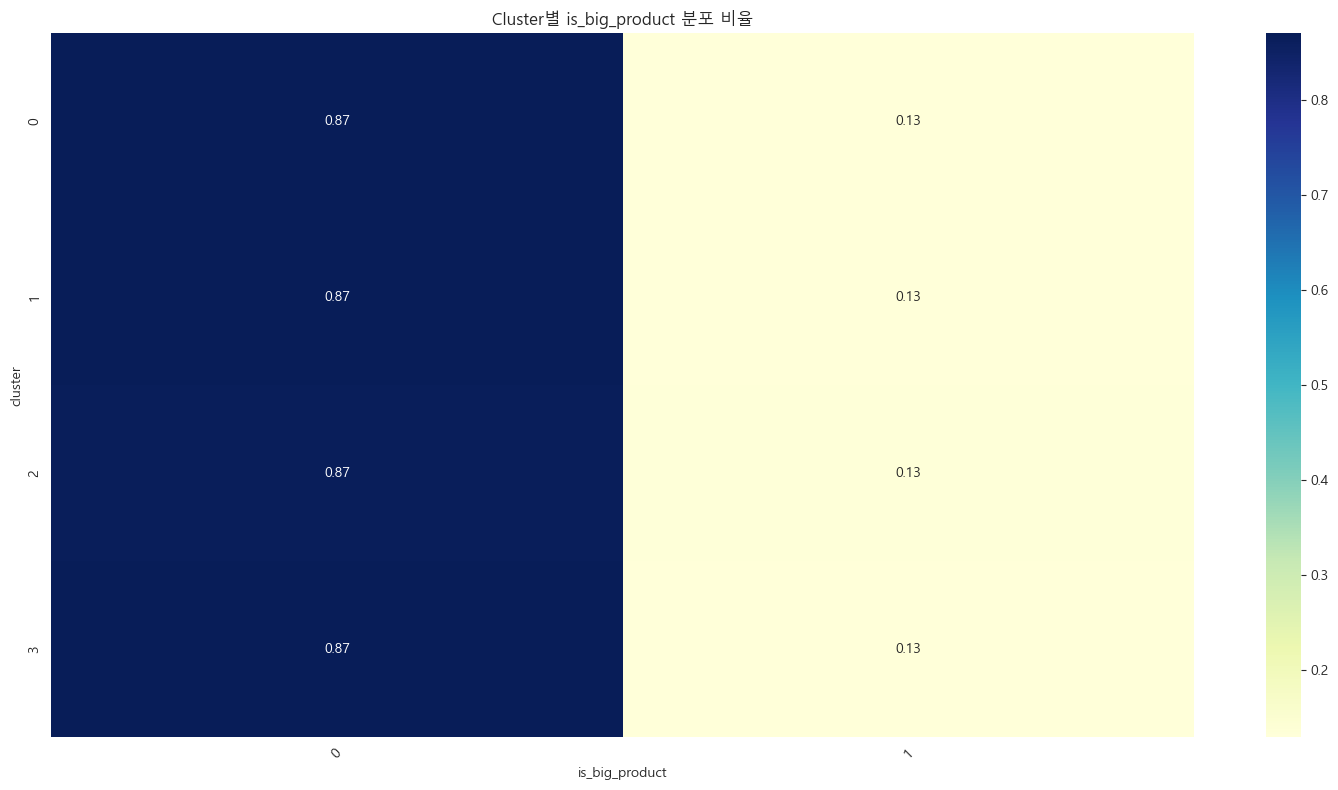

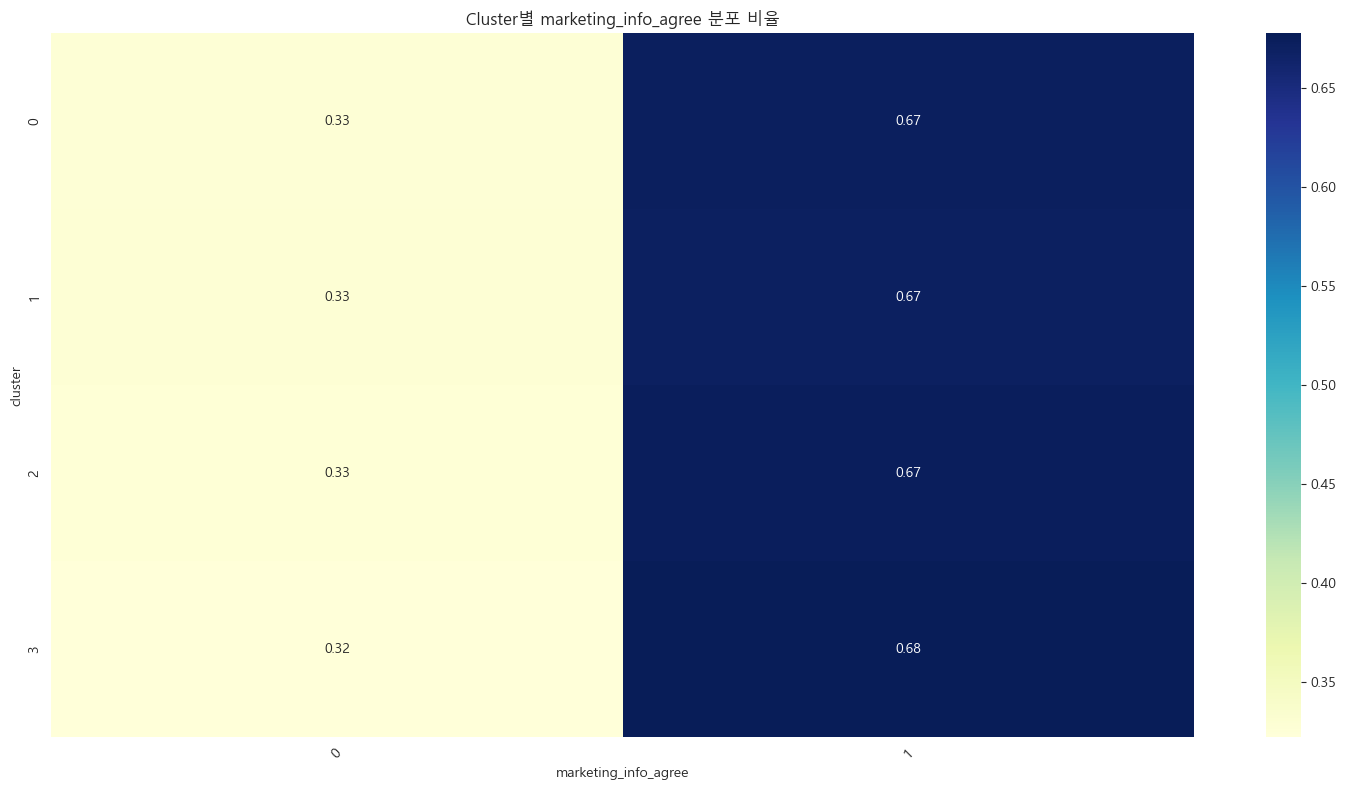

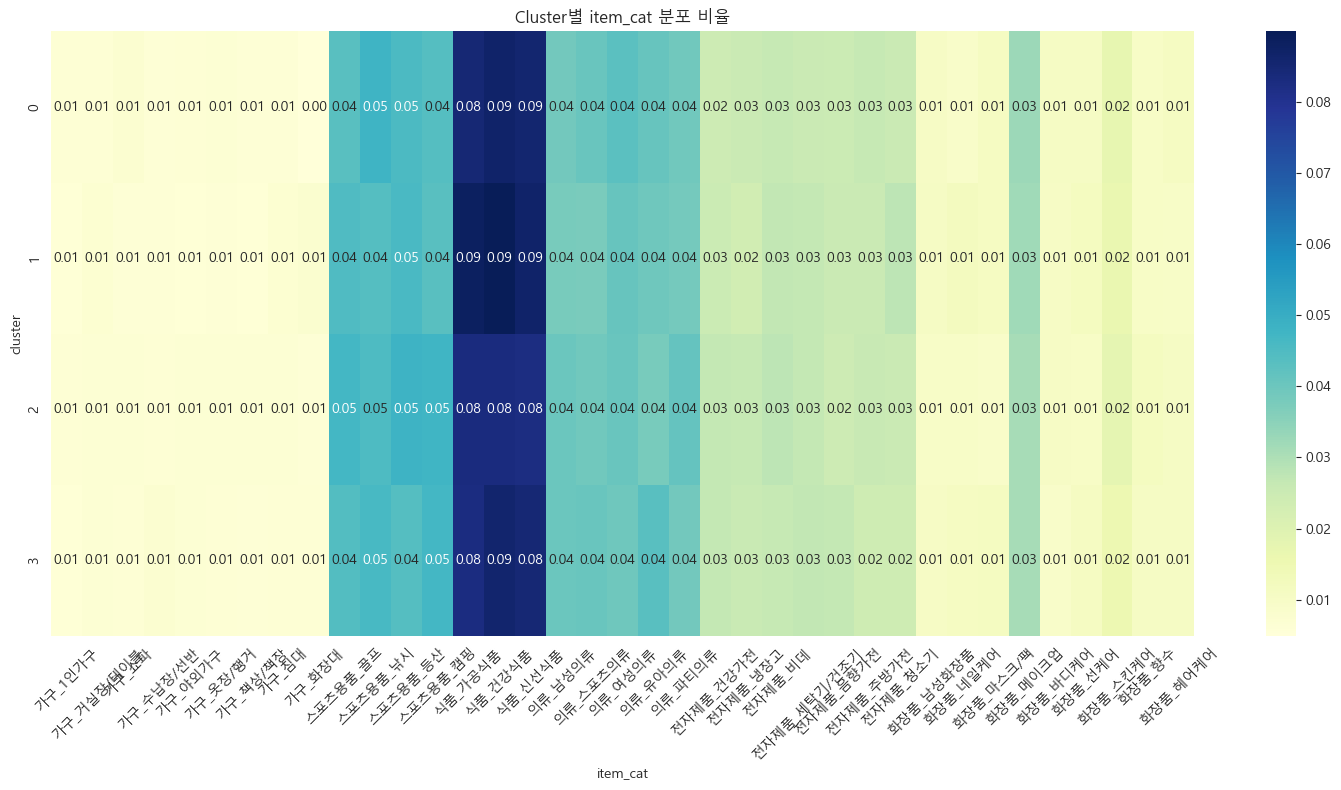

In [102]:
# ÌÅ¥Îü¨Ïä§ÌÑ∞ ÎùºÎ≤® Î∂ôÏó¨ÏßÑ df_mixed Í∏∞Ï§ÄÏúºÎ°ú Î≥ëÌï©
df_merged = marketing_delivered.copy()
df_merged['cluster'] = df_mixed['Cluster'].values
marketing_delivered['cluster4'] = df_mixed['Cluster'].values

cols = [
    'payment_type', 'category1', 'category2', 'is_big_product', 'marketing_info_agree', 'item_cat'
]

for col in cols:
    ct = pd.crosstab(df_merged['cluster'], df_merged[col], normalize='index')
    plt.figure(figsize=(15, 8))
    sns.heatmap(ct, annot=True, fmt=".2f", cmap='YlGnBu')
    plt.title(f'ClusterÎ≥Ñ {col} Î∂ÑÌè¨ ÎπÑÏú®')
    plt.ylabel('cluster')
    plt.xlabel(col)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(os.path.join(save_dir, f"4clu{col}heat"), dpi=300)
    plt.show()

# for col in cols:
#    ct = pd.crosstab(df_merged['cluster'], df_merged[col])
#    plt.figure(figsize=(15, 8))
#    sns.heatmap(ct, annot=True, fmt="d", cmap='Oranges')
#    plt.title(f'[Ï†àÎåÄÍ∞í] ClusterÎ≥Ñ {col} Î∂ÑÌè¨')
#    plt.ylabel('cluster')
#    plt.xlabel(col)
#    plt.xticks(rotation=45)
#    plt.tight_layout()
#    plt.show()

In [91]:
marketing_delivered.groupby('cluster4')['review_score'].mean().reset_index().rename(columns={
    'review_score': 'avg_review_score'
})

cluster4  avg_review_score
0         0          3.338188
1         1          2.950364
2         2          2.572030
3         3          4.148876

In [100]:
# LTVÎûÄ?
# LTV (Customer Lifetime Value, Í≥†Í∞ù ÏÉùÏï† Í∞ÄÏπò) : Ìïú Í≥†Í∞ùÏù¥ Ïö∞Î¶¨ÏôÄ Í±∞ÎûòÌïòÎ©¥ÏÑú ÏòàÏÉÅÎêòÎäî Ï¥ù ÏàòÏùµ

ltv_df = df_merged.groupby('cluster').agg(
    total_ltv=('total_price', 'sum'),  # Ï¥ù Íµ¨Îß§ Í∏àÏï°
    avg_ltv=('total_price', 'mean'),   # Íµ¨Îß§ 1Í±¥Îãπ ÌèâÍ∑† Í∏àÏï°
    purchase_count=('order_id', 'count'),  # Ï¥ù Íµ¨Îß§Í±¥Ïàò
    unique_customers=('customer_id', 'nunique')  # Í≥†Í∞ù Ïàò
).reset_index()

# Í≥†Í∞ùÎãπ ÌèâÍ∑† LTV Î∞è Ïû¨Íµ¨Îß§Ïú®
ltv_df['ltv_per_customer'] = ltv_df['total_ltv'] / ltv_df['unique_customers']
ltv_df['repurchase_rate'] = ltv_df['purchase_count'] / ltv_df['unique_customers']

ltv_df


cluster   total_ltv    avg_ltv  purchase_count  unique_customers  ltv_per_customer  repurchase_rate
0        0  2525215.01  88.625803           28493             26554         95.097349         1.073021
1        1  1222615.14  83.244716           14687             13318         91.801707         1.102793
2        2  2585987.52  88.573350           29196             26513         97.536587         1.101196
3        3  2648622.23  87.586714           30240             28811         91.930937         1.049599

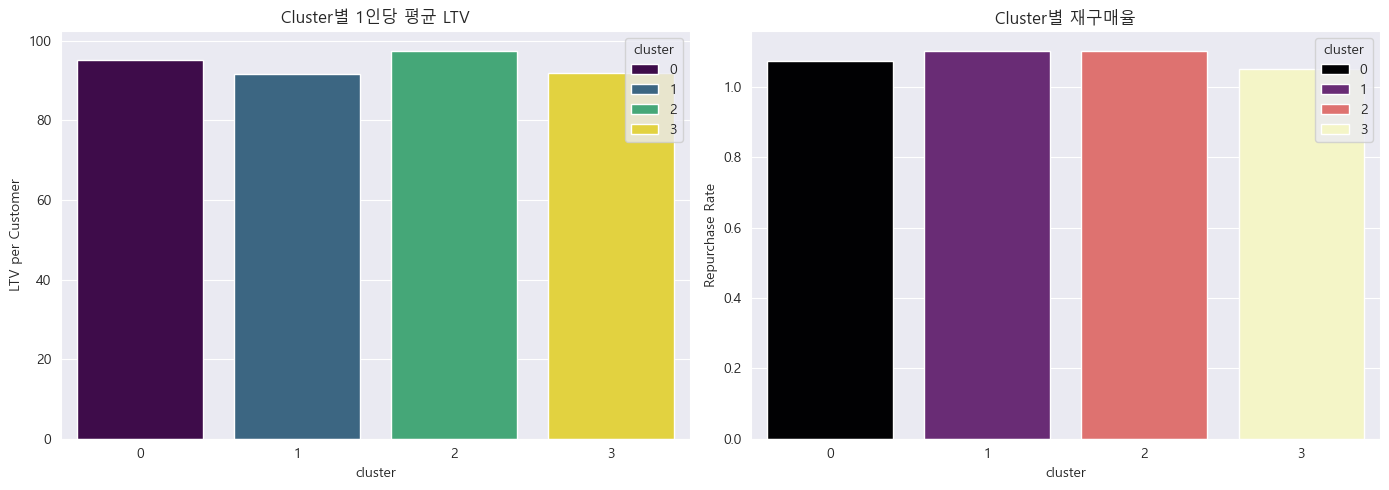

In [101]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# LTV per customer ÏãúÍ∞ÅÌôî
sns.barplot(data=ltv_df, x='cluster', y='ltv_per_customer', hue='cluster', ax=axes[0], palette='viridis')
axes[0].set_title('ClusterÎ≥Ñ 1Ïù∏Îãπ ÌèâÍ∑† LTV')
axes[0].set_ylabel('LTV per Customer')
axes[0].set_xlabel('cluster')

# Ïû¨Íµ¨Îß§Ïú® ÏãúÍ∞ÅÌôî
sns.barplot(data=ltv_df, x='cluster', y='repurchase_rate', hue='cluster', ax=axes[1], palette='magma')
axes[1].set_title('ClusterÎ≥Ñ Ïû¨Íµ¨Îß§Ïú®')
axes[1].set_ylabel('Repurchase Rate')
axes[1].set_xlabel('cluster')

plt.tight_layout()
plt.savefig(os.path.join(save_dir, f"4clultv"), dpi=300)
plt.show()